<a href="https://colab.research.google.com/github/elhamnadimi/social-network-analysis-proj/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
load('/content/CISPRINWOSmatrices.RData')

In [ ]:
load('/content/CISPRINWOS_attributes.RData')

In [ ]:
ls(CIS)

Warning message in ls(CIS):
“‘CIS’ converted to character string”


ERROR: ignored

In [ ]:
install.packages("igraphdata")
install.packages("igraph")
install.packages("network")
install.packages("statnet")
install.packages("intergraph")
install.packages("dplyr")
install.packages("stringr")
install.packages("RColorBrewer")
install.packages("sand")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolve’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("igraphdata")
library("igraph")
library("network")
library("statnet")
library("intergraph")
library("dplyr")
library("stringr")
library("RColorBrewer")
library("sand")
library("stringr")
library("ggplot2")

ERROR: ignored

In [ ]:
nodePRIN <- data.frame(CIS)
#nodePRIN
relationsp <- as.matrix(CISFull)

PRIN_graph = graph_from_adjacency_matrix(relationsp, mode="undirected",weighted = TRUE)
PRIN_graph


IGRAPH 8b199cd UNW- 1525 2534 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 8b199cd (vertex names):
 [1] A0013--A0936 A0013--A1828 A0013--S0063 A0013--S0075 A0013--S0348
 [6] A0016--S0138 A0018--S0008 A0018--S0639 A0034--S0163 A0035--AC474
[11] A0035--S0394 A0045--A1487 A0045--S0716 A0057--A2146 A0057--S0280
[16] A0058--A1111 A0058--S0698 A0059--S0085 A0059--S0662 A0064--S0033
[21] A0074--S0159 A0074--S0628 A0086--S0023 A0086--S0187 A0086--S0662
[26] A0089--A2077 A0089--S0055 A0089--S0071 A0096--S0054 A0096--S0773
[31] A0098--AC237 A0098--AC277 A0098--AC356 A0098--AC433 A0098--S0186
[36] A0098--S0331 A0098--S0443 A0098--S0634 A0102--AC427 A0102--S0759
+ ... omitted several edges

In [ ]:
allcodes_vec <- as.vector(V(PRIN_graph)$name)#vector of all names of nodes in the PrinFull
External_authors<-str_subset(allcodes_vec, "A")
#External_authors
#Also we subset all codes that start from S-Italian authors from matrix with all names of nodes in the CISFull and save them as InternalCodes
InternalCodes<-str_subset(allcodes_vec, "S")
#InternalCodes

#Here we found what authors are representes in both tables CIS and CISFull and we will assign to them all given attributes.
Italiancodes_vec <- as.vector(nodePRIN$Code)#choose all codes from CIS dataframe-table of Italian statisticians.
Italian_authors <- intersect(InternalCodes,Italiancodes_vec)#intersection of Italian authors code from the previous table with the full matrix of egdes between codes. 
#Italian_authors

In [ ]:
#Here we found what authors are representes in both tables CIS and CISFull and we will assign to them all given attributes.
Italiancodes_vec <- as.vector(nodePRIN$Code)#choose all codes from CIS dataframe-table of Italian statisticians.
Italian_authors <- intersect(InternalCodes,Italiancodes_vec)#intersection of Italian authors code from the previous table with the full matrix of egdes between codes. 
#Italian_authors
#Here we found what authors are presented in relationship table CISFull, but not in attributes table CIS with codes similar to Italian statistitians, starting from S.
Unknown_italian_authors <- setdiff(InternalCodes,Italiancodes_vec)
#Unknown_italian_authors

In [ ]:
#Set of nodes attributes - Author names
vertex_attr(PRIN_graph, "Author",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- as.character(nodePRIN$AUTHOR)
vertex_attr(PRIN_graph, "Author",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% External_authors]) <- "External"
vertex_attr(PRIN_graph, "Author",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Unknown_italian_authors]) <- "Unknown"
#Set other attributes
vertex_attr(PRIN_graph, "Sector",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- as.character(nodePRIN$Sector)
vertex_attr(PRIN_graph, "H.Index",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$H.Index
vertex_attr(PRIN_graph, "NumDocs",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$NumDocs
vertex_attr(PRIN_graph, "References",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$References
vertex_attr(PRIN_graph, "Citations",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$Citations
#set additional attribute type of authors-foreign/italian for futher plotting
vertex_attr(PRIN_graph, "Author.Type",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% InternalCodes]) <- "Italian_researchers"
vertex_attr(PRIN_graph, "Author.Type",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% External_authors]) <- "Foreign_researchers"

vertex.attributes(PRIN_graph)
summary(PRIN_graph)


$name
   [1] "A0013" "A0016" "A0018" "A0034" "A0035" "A0045" "A0057" "A0058" "A0059"
  [10] "A0064" "A0074" "A0086" "A0089" "A0096" "A0098" "A0102" "A0105" "A0127"
  [19] "A0130" "A0135" "A0137" "A0151" "A0160" "A0171" "A0180" "A0183" "A0188"
  [28] "A0193" "A0205" "A0206" "A0214" "A0225" "A0226" "A0227" "A0234" "A0239"
  [37] "A0245" "A0248" "A0260" "A0261" "A0264" "A0266" "A0267" "A0275" "A0281"
  [46] "A0283" "A0284" "A0285" "A0288" "A0291" "A0295" "A0296" "A0308" "A0309"
  [55] "A0329" "A0337" "A0338" "A0340" "A0343" "A0358" "A0361" "A0364" "A0366"
  [64] "A0375" "A0387" "A0389" "A0393" "A0397" "A0403" "A0407" "A0408" "A0409"
  [73] "A0413" "A0415" "A0425" "A0436" "A0437" "A0438" "A0452" "A0463" "A0473"
  [82] "A0484" "A0487" "A0490" "A0491" "A0502" "A0507" "A0527" "A0531" "A0534"
  [91] "A0538" "A0541" "A0548" "A0550" "A0554" "A0556" "A0557" "A0562" "A0572"
 [100] "A0581" "A0583" "A0585" "A0591" "A0597" "A0598" "A0603" "A0604" "A0606"
 [109] "A0611" "A0626" "A0644" "A0646" "A0649" "A0653" "A0659" "A0664" "A0669"
 [118] "A0672" "A0675" "A0682" "A0685" "A0693" "A0698" "A0700" "A0701" "A0721"
 [127] "A0722" "A0723" "A0724" "A0726" "A0727" "A0733" "A0737" "A0750" "A0751"
 [136] "A0756" "A0758" "A0761" "A0778" "A0805" "A0815" "A0821" "A0822" "A0829"
 [145] "A0839" "A0842" "A0845" "A0858" "A0862" "A0876" "A0879" "A0886" "A0890"
 [154] "A0891" "A0900" "A0905" "A0918" "A0919" "A0922" "A0923" "A0929" "A0931"
 [163] "A0933" "A0934" "A0936" "A0953" "A0966" "A0979" "A0980" "A0981" "A0987"
 [172] "A0995" "A0998" "A1001" "A1003" "A1012" "A1013" "A1019" "A1023" "A1024"
 [181] "A1027" "A1028" "A1032" "A1033" "A1035" "A1037" "A1038" "A1041" "A1042"
 [190] "A1043" "A1044" "A1045" "A1048" "A1054" "A1062" "A1065" "A1068" "A1070"
 [199] "A1073" "A1087" "A1088" "A1090" "A1096" "A1097" "A1104" "A1108" "A1111"
 [208] "A1113" "A1114" "A1119" "A1121" "A1136" "A1137" "A1142" "A1143" "A1147"
 [217] "A1149" "A1157" "A1158" "A1159" "A1164" "A1165" "A1169" "A1170" "A1172"
 [226] "A1173" "A1174" "A1175" "A1176" "A1177" "A1178" "A1183" "A1184" "A1192"
 [235] "A1197" "A1199" "A1207" "A1208" "A1212" "A1220" "A1223" "A1224" "A1227"
 [244] "A1243" "A1255" "A1259" "A1261" "A1275" "A1287" "A1291" "A1292" "A1299"
 [253] "A1309" "A1311" "A1319" "A1326" "A1338" "A1339" "A1341" "A1343" "A1347"
 [262] "A1352" "A1362" "A1372" "A1373" "A1401" "A1407" "A1419" "A1425" "A1427"
 [271] "A1430" "A1439" "A1441" "A1442" "A1445" "A1446" "A1447" "A1451" "A1458"
 [280] "A1460" "A1462" "A1473" "A1479" "A1482" "A1483" "A1485" "A1486" "A1487"
 [289] "A1488" "A1493" "A1494" "A1495" "A1498" "A1500" "A1503" "A1504" "A1524"
 [298] "A1535" "A1544" "A1555" "A1557" "A1559" "A1561" "A1563" "A1567" "A1570"
 [307] "A1572" "A1576" "A1582" "A1601" "A1605" "A1606" "A1608" "A1628" "A1636"
 [316] "A1639" "A1644" "A1647" "A1656" "A1660" "A1662" "A1663" "A1664" "A1666"
 [325] "A1669" "A1673" "A1681" "A1695" "A1698" "A1699" "A1711" "A1715" "A1720"
 [334] "A1727" "A1728" "A1729" "A1734" "A1735" "A1743" "A1746" "A1749" "A1754"
 [343] "A1765" "A1768" "A1771" "A1773" "A1778" "A1785" "A1788" "A1795" "A1796"
 [352] "A1802" "A1804" "A1807" "A1808" "A1814" "A1816" "A1826" "A1828" "A1829"
 [361] "A1830" "A1839" "A1840" "A1845" "A1847" "A1856" "A1859" "A1865" "A1869"
 [370] "A1872" "A1873" "A1881" "A1890" "A1900" "A1902" "A1905" "A1907" "A1928"
 [379] "A1933" "A1951" "A1954" "A1956" "A1960" "A1972" "A1981" "A1987" "A1989"
 [388] "A1993" "A2008" "A2009" "A2010" "A2015" "A2021" "A2024" "A2029" "A2038"
 [397] "A2044" "A2045" "A2054" "A2057" "A2062" "A2070" "A2073" "A2074" "A2075"
 [406] "A2077" "A2086" "A2090" "A2108" "A2112" "A2124" "A2127" "A2128" "A2136"
 [415] "A2137" "A2146" "A2153" "A2158" "A2159" "A2160" "A2161" "A2162" "A2168"
 [424] "A2169" "A2174" "A2175" "A2186" "A2192" "A2198" "A2213" "A2217" "A2218"
 [433] "A2227" "A2229" "A2230" "A2231" "A2234" "A2236" "A2238" "A2246" "A2247"
 [442] "A2249" "A2250" "A2251" "A2253" "A2259" "A2271" "A2277" "A2278" "A2283"
 [451] "AC001" "AC002" "AC003" "AC004" "AC00

IGRAPH 8b199cd UNW- 1525 2534 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)


In [ ]:
vertex_attr_names(PRIN_graph)


[1] "name"        "Author"      "Sector"      "H.Index"     "NumDocs"    
 [6] "References"  "Citations"   "Author.Type" "color"       "size"       
[11] "nodedegree"

In [ ]:
#transforming from Igraph to Network
PRIN_NET<-asNetwork(PRIN_graph)
PRIN_NET

 Network attributes:
  vertices = 1525 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 2534 
    missing edges= 0 
    non-missing edges= 2534 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names not shown 

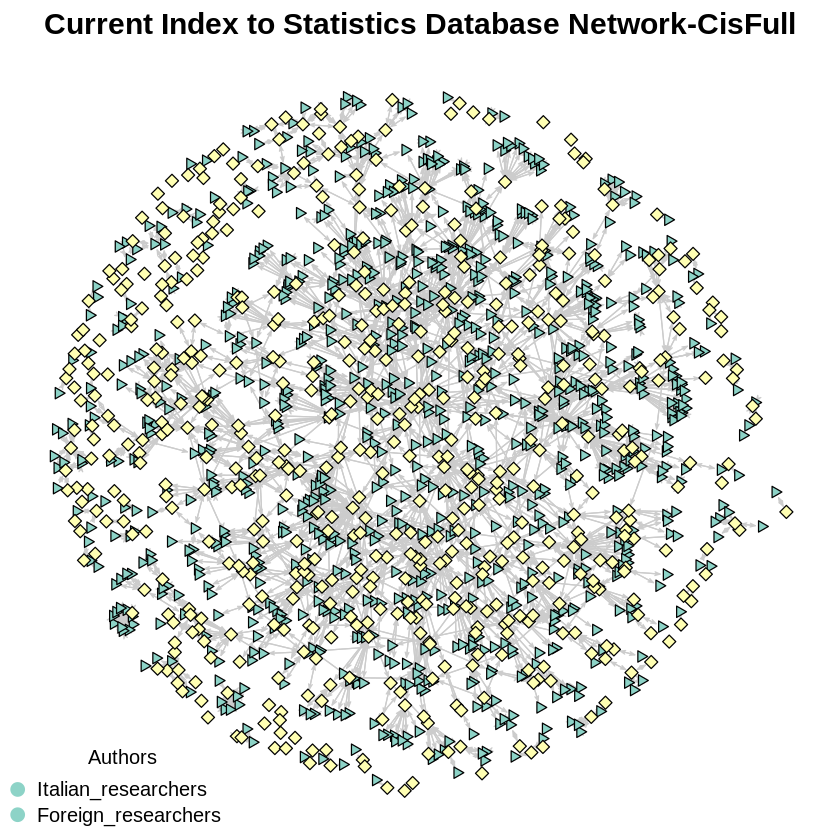

In [ ]:
#visualizing the Large network and as we can see the contrality is not in the center of graph.
my_pal <- brewer.pal(11,"Set3")
rolecat <- as.factor(get.vertex.attribute(PRIN_NET,"Author.Type"))
par(mar=c(0,0,2,0))


sidenum <- 3:7
gplot(PRIN_NET,vertex.cex=2.4,
      edge.col="grey80",edge.lwd=0.02,
      thresh=0.01,jitter=TRUE,
      vertex.sides=sidenum[rolecat]
     ,cex.main=1.5,layout.fruchterman.reingold,
      vertex.col=my_pal[rolecat],main="Current Index to Statistics Database Network-CisFull")

legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal[rolecat],pch=19,pt.cex=1.5,bty="n",
title="Authors")


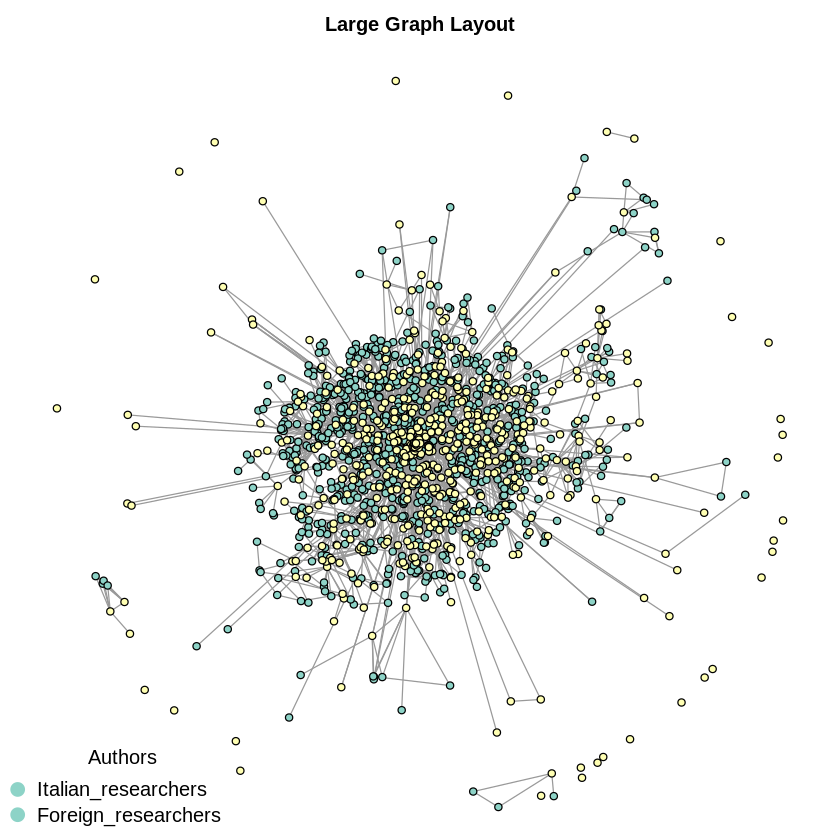

In [ ]:
#anather way of ploting
my_pal <- brewer.pal(11,"Set3")

rolecat <- as.factor(get.vertex.attribute(PRIN_NET,"Author.Type"))
#anather way of plotting
par(mar=c(0,0,2,0))
#deg <- degree(PRIN_NET,rescale=TRUE)
#V(PRIN_graph)$size <- deg*1500
V(PRIN_graph)$color <-my_pal[rolecat]
l=layout.kamada.kawai(PRIN_graph)
plot(PRIN_graph,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,layout=l,vertex.size=2)
  title(main="Large Graph Layout", cex.main=1)

  legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal[rolecat],pch=19,pt.cex=1.5,bty="n",
title="Authors")


In [ ]:
table(degree(PRIN_NET,gmode="graph")) #as we can see here, it has 60 isolated 


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20 
 60 386 369 260 127  84  74  41  20  19  31  11  10   6   6   4   3   2   1   2 
 22  24  26  28  29  33  34  38 
  1   1   2   1   1   1   1   1 

S0507 S0683 S0336 S0577 S0662 S0394 S0071 
   26    26    28    29    33    34    38

[1] "BILANCIA M"  "GROSSI L"    "MAROZZI M"   "PASTORE A"   "RETTAROLI R"
[6] "TREVISANI M" "VERONESE P"

             
              SECS-S/01 SECS-S/03 SECS-S/04
  BILANCIA M          1         0         0
  GROSSI L            0         1         0
  MAROZZI M           1         0         0
  PASTORE A           1         0         0
  RETTAROLI R         0         0         1
  TREVISANI M         1         0         0
  VERONESE P          1         0         0

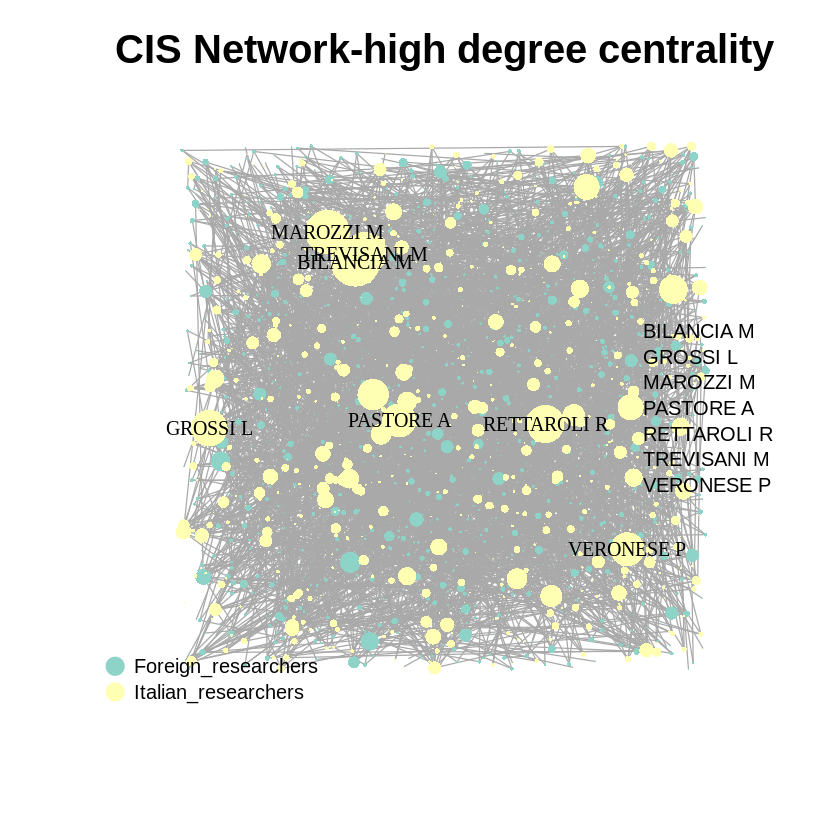

In [ ]:
my_pal <- brewer.pal(11,"Set3")
rolecat <- my_pal[as.numeric(as.factor(V(PRIN_graph)$Author.Type))]


CIS_CI<- igraph::degree(PRIN_graph)
sorted<-sort(CIS_CI, decreasing = FALSE)
max_citation<-sorted[c(1519,1520,1521,1522,1523,1524,1525)] #HIGHEST degree that I used to plot in the next code.
max_citation

V(PRIN_graph)$Author[CIS_CI %in% max_citation]#authors that have the most degrees

#IN WHICH SECTOR DO AUTHORS WITH HIGH CITATION BELONG? they are mostly belong to sector 1.
table(V(PRIN_graph)$Author[CIS_CI %in% max_citation],V(PRIN_graph)$Sector[CIS_CI%in% max_citation])


#Plot the graph with node size equal to node degree
V(PRIN_graph)$size <- CIS_CI*0.5
plot(PRIN_graph,layout=layout.random,
vertex.frame.color=NA,vertex.label.color="black",
vertex.color= rolecat,vertex.label = ifelse(CIS_CI %in% max_citation ,
V(PRIN_graph)$Author, NA),vertex.label.dist=0)

legend("bottomleft", legend=levels(as.factor(V(PRIN_graph)$Author.Type)),
col = my_pal, bty = 'n', pch=20 , pt.cex = 3, cex = 1, text.col='black' ,
 horiz = FALSE)

legend("right", legend=as.character(V(PRIN_graph)$Author[CIS_CI %in% max_citation]), 
bty = 'n', pch=NA_integer_ , pt.cex = 6, cex = 1, text.col='black' , 
horiz = FALSE)

title(main="CIS Network-high degree centrality", cex.main=2)



In [ ]:
#This vertix has the most highest degree with degree 38
y <- get.inducedSubgraph(PRIN_NET,
                         which(degree(PRIN_NET,gmode="graph")== "38"))
Y2<-asIgraph(y)                         
vertex.attributes(Y2)

$Author
[1] "BILANCIA M"

$Author.Type
[1] "Italian_researchers"

$Citations
[1] 24

$H.Index
[1] 3

$na
[1] FALSE

$NumDocs
[1] 8

$References
[1] 300

$Sector
[1] "SECS-S/01"

$vertex.names
[1] "S0071"

In [ ]:
ci<- sort(unique(V(PRIN_graph)$Citations))
ci
#c<-sort(table(V(PRIN_graph)$Citations))
high_cit<-ci[119:145] # citation that I used to plot in the next code.
high_cit


V(PRIN_graph)$Author[ci %in% high_cit]#authors that have the most CITATIONS

#IN WHICH SECTOR DO AUTHORS WITH HIGH CITATION BELONG? they are mostly belong to sector 1.
table(V(PRIN_graph)$Author[ci %in% high_cit],V(PRIN_graph)$Sector[ci%in% high_cit])



[1]    0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
 [16]   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29
 [31]   30   31   32   33   34   35   36   37   38   39   40   41   42   43   45
 [46]   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
 [61]   64   65   66   67   68   70   71   74   75   76   77   78   79   80   81
 [76]   82   83   84   86   87   88   89   91   95   96   98   99  100  102  103
 [91]  104  108  109  115  117  125  129  131  132  136  138  146  148  151  154
[106]  156  163  166  169  172  179  181  185  186  195  198  209  212  218  231
[121]  237  245  264  268  272  277  296  299  305  310  314  326  333  340  353
[136]  386  420  428  448  561  755 1142 1143 1260 2564

[1]  218  231  237  245  264  268  272  277  296  299  305  310  314  326  333
[16]  340  353  386  420  428  448  561  755 1142 1143 1260 2564

[1] "External"          "External"          "External"         
  [4] "External"          "External"          "External"         
  [7] "External"          "External"          "External"         
 [10] "External"          "External"          "External"         
 [13] "External"          "External"          "External"         
 [16] "External"          "External"          "External"         
 [19] "External"          "External"          "External"         
 [22] "External"          "External"          "External"         
 [25] "External"          "External"          "External"         
 [28] "External"          "External"          "External"         
 [31] "External"          "External"          "External"         
 [34] "External"          "External"          "External"         
 [37] "External"          "External"          "External"         
 [40] "External"          "External"          "External"         
 [43] "External"          "External"          "External"         
 [46] "External"          "External"          "External"         
 [49] "External"          "External"          "External"         
 [52] "External"          "External"          "External"         
 [55] "External"          "External"          "External"         
 [58] "External"          "External"          "External"         
 [61] "External"          "External"          "External"         
 [64] "External"          "External"          "External"         
 [67] "External"          "External"          "External"         
 [70] "External"          "External"          "External"         
 [73] "External"          "External"          "External"         
 [76] "External"          "External"          "External"         
 [79] "External"          "External"          "External"         
 [82] "External"          "External"          "External"         
 [85] "External"          "External"          "External"         
 [88] "External"          "External"          "External"         
 [91] "External"          "External"          "External"         
 [94] "External"          "External"          "External"         
 [97] "External"          "External"          "External"         
[100] "External"          "External"          "External"         
[103] "External"          "External"          "External"         
[106] "External"          "External"          "External"         
[109] "External"          "External"          "External"         
[112] "External"          "External"          "External"         
[115] "External"          "External"          "External"         
[118] "External"          "External"          "External"         
[121] "External"          "External"          "External"         
[124] "External"          "External"          "External"         
[127] "External"          "External"          "External"         
[130] "External"          "External"          "External"         
[133] "External"          "External"          "External"         
[136] "External"          "External"          "External"         
[139] "External"          "External"          "External"         
[142] "External"          "External"          "External"         
[145] "External"          "External"          "External"         
[148] "External"          "External"          "External"         
[151] "External"          "External"          "External"         
[154] "External"          "External"          "External"         
[157] "External"          "External"          "External"         
[160] "External"          "External"          "External"         
[163] "BETTI G"           "BIGGERI A"         "BIGGERI L"        
[166] "Unknown"           "BILANCIA M"        "BINI M"           
[169] "BIRINDELLI AM"     "BISAGLIA L"        "BLANGIARDO GC"    
[172] "BOARI G"           "BOCCUZZO G"        "BOLASCO S"        
[175] "BOLZAN M"          "BONAGUIDI A"       "BONETTI M"        
[178] "Unknown"           "Unknown"           "BONO F"           
[181] "BORDIGNON S"       "Unknown"       

                   
                    SECS-S/01 SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05
  BETTI G                   0         0         1         0         0
  BIGGERI A                 0         1         0         0         0
  BIGGERI L                 0         0         1         0         0
  BILANCIA M                1         0         0         0         0
  BINI M                    0         0         1         0         0
  BIRINDELLI AM             0         0         0         1         0
  BISAGLIA L                0         0         1         0         0
  BLANGIARDO GC             0         0         0         1         0
  BOARI G                   1         0         0         0         0
  BOCCUZZO G                0         0         0         0         1
  BOLASCO S                 1         0         0         0         0
  BOLZAN M                  0         0         0         0         1
  BONAGUIDI A               0         0         0         1         0


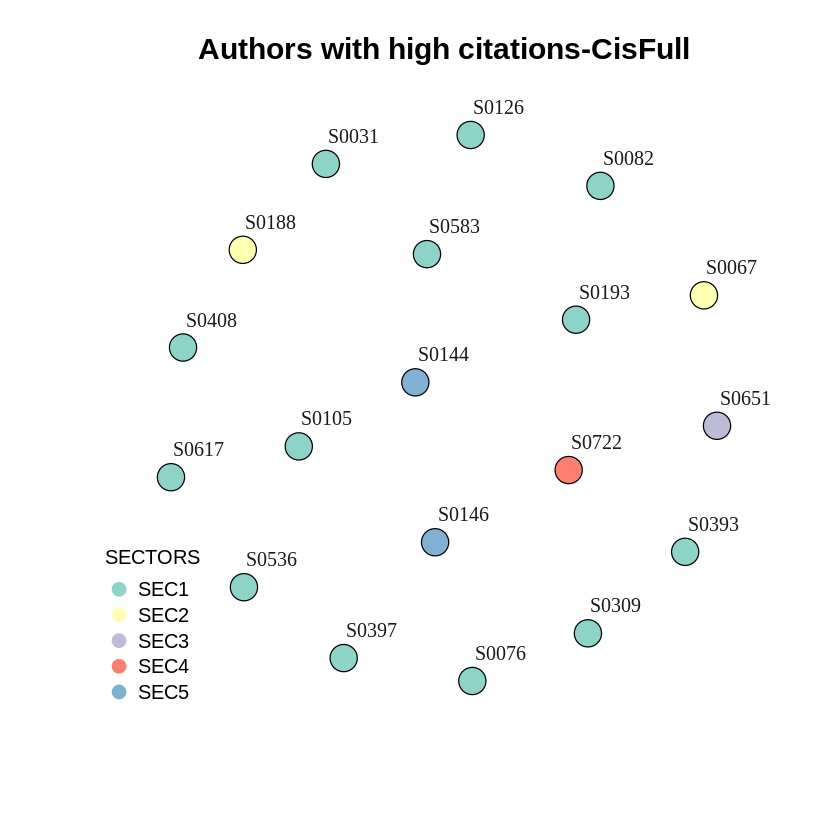

In [ ]:
#visualizing which Citations is the most high.
#the red node shows that degree of node is more than 1.
my_pal <- brewer.pal(11,"Set3")

new_graph<-induced.subgraph(PRIN_graph, 
  which(V(PRIN_graph)$Citations %in% c("299","305","310","314","310","326","333",
  "340","353","386","420","428","448","561",
  "755","1142","1143","1260","2564")))


hh<-asNetwork(new_graph)
my_color <- my_pal[as.numeric(as.factor(V(new_graph)$Sector))]

V(new_graph)$color <- my_color

plot(new_graph, 
     vertex.size=10,edge.color="gray20", usecurve=TRUE,
     edge.lwd=0.02,
     vertex.label.dist=2,
     pad=0.9,
     edge.arrow.size=.1,
     vertex.label.color ="gray10",
     vertex.label.cex=1,edge.curved=0.3)

title(main="Authors with high citations-CisFull", cex.main=1.5)

legend("bottomleft",legend=c("SEC1","SEC2","SEC3","SEC4","SEC5"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="SECTORS")

In [ ]:
it <- which(V(PRIN_graph)$name %in% Italiancodes_vec) 
# Extract subgraph of italian researchers only
ll <- induced.subgraph(graph=PRIN_graph,vids=it)
ll
l<-asNetwork(ll)
l

IGRAPH 6fd45e0 UNW- 465 524 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), color
| (v/c), weight (e/n)
+ edges from 6fd45e0 (vertex names):
 [1] S0040--S0050 S0022--S0057 S0001--S0067 S0055--S0071 S0001--S0074
 [6] S0063--S0075 S0071--S0075 S0072--S0075 S0077--S0092 S0079--S0092
[11] S0074--S0093 S0036--S0096 S0056--S0102 S0062--S0121 S0069--S0121
[16] S0004--S0123 S0055--S0129 S0079--S0131 S0033--S0132 S0033--S0133
[21] S0029--S0138 S0106--S0144 S0121--S0153 S0067--S0160 S0033--S0166
[26] S0055--S0166 S0015--S0168 S0109--S0176 S0154--S0180 S0042--S0181
+ ... omitted several edges

 Network attributes:
  vertices = 465 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 524 
    missing edges= 0 
    non-missing edges= 524 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

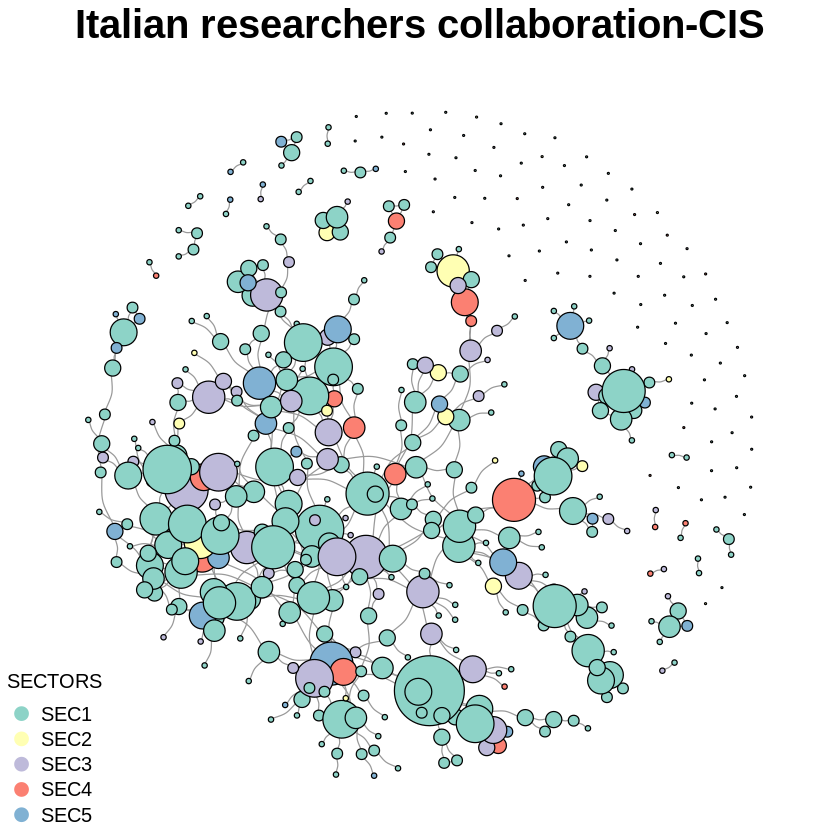

In [ ]:
#vidualizing based on the italian researchers and the size of node is proportional to degree.
my_pal <- brewer.pal(11,"Set3")

par(mar=c(0,0,2,0))

deg <- degree(l,rescale=TRUE) #degree for scaling the node
V(ll)$size <- deg*1700

rolecat <- as.factor(get.vertex.attribute(l,"Sector")) # for coloring the node
V(ll)$color<- my_pal[rolecat]

plot(ll,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers collaboration-CIS", cex.main=2)

legend("bottomleft",legend=c("SEC1","SEC2","SEC3","SEC4","SEC5"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="SECTORS")



In [ ]:
#Basic Description
#network.size(PRIN_NET) #the # of authors
#network.size(l) #the # of italian authors
gden(PRIN_NET)
components(PRIN_NET) # split into various subgroups
#In the following code the largest component is extracted into a new matrix.
#The geodesics (shortest paths) are then calculated for each pair of nodes using the
#geodist() function. The maximum geodesic is then extracted,
# which is the diameter for this component.
lgc <- component.largest(PRIN_NET,result="graph")
gd <- geodist(lgc)
max(gd$gdist)
#count how many isolates there are:from this output.
table(component.dist(PRIN_NET)$csize)  #finding isolated
#As we can see the number of isoletd node is 7.
#the number of isolated node
length(V(PRIN_graph)$name[igraph::degree(PRIN_graph)==0]) #finding isolated
diameter(PRIN_graph)#The longest shortest path
centralization(PRIN_NET,degree, mode= "graph") 

#Closeness centrality-centrality based on distance to others in the graph
#CIS.clos<-igraph::closeness(PRIN_graph, mode="all")
centr_clo(PRIN_graph, mode="all", normalized=T)

#Eigen centrality-centrality proportional to the sum of connection centralities
#CIS.eigen<-eigen_centrality(CIS_graph, directed=F)
centr_eigen(PRIN_graph, directed=F, normalized=T)

# Centralization: Network Level Indices of Centrality
centralization(PRIN_NET,degree, mode= "graph") 



[1] 0.002180629

[1] 114

[1] 19


   1    2    3    4    5    6    7    8   11   13   14 1277 
  60   29    8    6    3    1    1    2    1    1    1    1 

[1] 60

[1] 19

[1] 0.02278363

Warning message in centr_clo(PRIN_graph, mode = "all", normalized = T):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


$res
   [1] 0.0039447119 0.0039166504 0.0039372113 0.0006570297 0.0039411415
   [6] 0.0039220833 0.0039016797 0.0039377199 0.0039260440 0.0039537382
  [11] 0.0039408154 0.0039260744 0.0039514316 0.0039089251 0.0039571670
  [16] 0.0039470413 0.0039498852 0.0006561680 0.0039510014 0.0039454676
  [21] 0.0039260845 0.0039578864 0.0039264588 0.0039473071 0.0039260440
  [26] 0.0006574616 0.0039495576 0.0039313713 0.0039309251 0.0039513599
  [31] 0.0039468471 0.0039500592 0.0039535843 0.0039521182 0.0039507760
  [36] 0.0039541895 0.0039380252 0.0039309251 0.0039321320 0.0039458456
  [41] 0.0039537382 0.0039537484 0.0039519030 0.0039363876 0.0039227698
  [46] 0.0039261047 0.0039394911 0.0039520054 0.0039432013 0.0039297392
  [51] 0.0039388700 0.0039314828 0.0039452634 0.0039456515 0.0038858023
  [56] 0.0039314017 0.0039182112 0.0038995632 0.0039480229 0.0039449570
  [61] 0.0006613728 0.0039470106 0.0039395114 0.0039356455 0.0039502333
  [66] 0.0039327611 0.0039168215 0.0039356455 0.0006613728 0.0039231031
  [71] 0.0039533792 0.0039329438 0.0039507965 0.0039176069 0.0039407440
  [76] 0.0039454166 0.0039470311 0.0039365808 0.0039260339 0.0039397559
  [81] 0.0039534612 0.0039525384 0.0039502947 0.0039212155 0.0039447323
  [86] 0.0039374860 0.0039088349 0.0039456617 0.0039238000 0.0039407237
  [91] 0.0039366214 0.0039176270 0.0006613705 0.0039314423 0.0039537382
  [96] 0.0039169222 0.0039509911 0.0039502640 0.0039313915 0.0039211247
 [101] 0.0039379133 0.0039471844 0.0039110418 0.0039559242 0.0039132712
 [106] 0.0039287970 0.0039532356 0.0039284527 0.0039290097 0.0039352288
 [111] 0.0039447221 0.0039385646 0.0039275010 0.0039582154 0.0039117445
 [116] 0.0039449672 0.0039081833 0.0039079328 0.0039480433 0.0006583276
 [121] 0.0039310569 0.0039500285 0.0039068308 0.0039499261 0.0039537382
 [126] 0.0039284628 0.0039374860 0.0039294251 0.0039579789 0.0039358691
 [131] 0.0039260137 0.0039470822 0.0039414065 0.0006570297 0.0006570299
 [136] 0.0039383610 0.0039495576 0.0039377505 0.0039313713 0.0039376691
 [141] 0.0006609325 0.0039499466 0.0039667873 0.0039470208 0.0039366214
 [146] 0.0039495679 0.0039452634 0.0039513599 0.0039407440 0.0039235172
 [151] 0.0039349646 0.0039331976 0.0039284527 0.0039542511 0.0039278553
 [156] 0.0039314423 0.0039420386 0.0039342536 0.0039453451 0.0039541382
 [161] 0.0039556161 0.0006613716 0.0039335529 0.0039110217 0.0039428341
 [166] 0.0039425791 0.0006561680 0.0039440586 0.0039444158 0.0039458456
 [171] 0.0039252755 0.0039593260 0.0039260845 0.0039335529 0.0006561680
 [176] 0.0039388700 0.0039372418 0.0039345888 0.0038957354 0.0039409784
 [181] 0.0039518722 0.0039415288 0.0039422731 0.0039207716 0.0039537382
 [186] 0.0039551336 0.0006583276 0.0039537484 0.0039400411 0.0038890448
 [191] 0.0039523334 0.0039047187 0.0006561680 0.0039260440 0.0039447221
 [196] 0.0039166605 0.0039349646 0.0039176069 0.0039358589 0.0039469391
 [201] 0.0006609322 0.0039373334 0.0039309149 0.0039523539 0.0039454370
 [206] 0.0039542100 0.0039377301 0.0039379234 0.0039513701 0.0039400411
 [211] 0.0039387885 0.0039244063 0.0039422731 0.0039374453 0.0039144372
 [216] 0.0039110418 0.0039412740 0.0039402957 0.0039548873 0.0039454370
 [221] 0.0039413046 0.0039447221 0.0006609325 0.0039485752 0.0039516058
 [226] 0.0039447119 0.0039340606 0.0039500183 0.0039485343 0.0039447221
 [231] 0.0039168215 0.0006578942 0.0039202673 0.0039489027 0.0039243860
 [236] 0.0039297088 0.0039365909 0.0039420182 0.0039291616 0.0039358589
 [241] 0.0039454268 0.0039336138 0.0039190374 0.0039499466 0.0039454370
 [246] 0.0039279970 0.0039366418 0.0039488208 0.0039005213 0.0039209027
 [251] 0.0039288071 0.0039450489 0.0039502947 0.0039566842 0.0039248307
 [256] 0.0039200757 0.0006574613 0.0039551336 0.0039312597 0.0039355032
 [261] 0.0006570297 0.0039469493 0.0039535740 0.0006561680 0.0039499364
 [266] 0.0039456515 0.0039509911 0.0039260440 0.0039498852 0.0039231031
 [271] 0.0039466324 0.0039495064 0.0039291819 0.0039415084 0.0039261047
 [276] 0.0039447323 0.0039364689 0.

$vector
   [1] 2.123642e-02 2.495039e-06 6.985868e-05 6.430725e-18 2.821199e-03
   [6] 2.667074e-06 4.347883e-08 7.039016e-04 1.932986e-05 1.807360e-03
  [11] 2.226436e-04 3.133590e-05 1.255008e-01 6.007570e-07 1.032536e-03
  [16] 1.926796e-04 4.248933e-04 1.763070e-18 5.165891e-04 2.573038e-04
  [21] 2.684165e-05 1.985287e-03 1.507734e-05 8.280722e-04 2.692613e-05
  [26] 0.000000e+00 1.826961e-03 2.687635e-05 3.601638e-05 2.750218e-03
  [31] 1.273650e-04 1.142160e-03 8.037210e-04 6.357795e-01 2.719126e-01
  [36] 8.153239e-04 7.189810e-05 3.601638e-05 1.802460e-04 2.014290e-03
  [41] 1.580173e-03 2.007344e-03 2.282070e-01 1.150029e-03 3.225652e-05
  [46] 3.255539e-05 2.835643e-05 3.312022e-03 4.030523e-04 1.181353e-05
  [51] 1.162516e-04 4.161661e-04 2.024986e-03 1.102286e-03 4.634903e-09
  [56] 3.356604e-05 6.657575e-06 1.545952e-07 8.331550e-04 1.971369e-04
  [61] 0.000000e+00 2.435446e-04 1.378734e-04 3.166373e-04 4.327696e-04
  [66] 3.308886e-05 1.525757e-06 3.166373e-04 0.000000e+00 2.363488e-06
  [71] 3.054903e-03 1.192691e-05 3.159322e-01 2.637444e-06 1.837070e-04
  [76] 5.562192e-04 1.734837e-04 7.888121e-03 1.975478e-05 1.388832e-04
  [81] 2.778361e-03 3.973441e-04 2.033261e-01 1.507045e-06 2.137416e-04
  [86] 5.363589e-05 6.603186e-07 6.797656e-04 1.119148e-05 2.769359e-04
  [91] 5.933315e-05 1.605874e-06 2.405520e-18 9.401812e-04 1.807360e-03
  [96] 4.123492e-07 4.604606e-04 2.429335e-01 3.055530e-05 2.682199e-06
 [101] 4.529903e-05 2.127337e-04 2.883195e-07 3.553010e-03 3.342357e-06
 [106] 1.303734e-05 1.610739e-03 1.017754e-05 9.874628e-04 3.661416e-05
 [111] 8.922237e-04 1.136531e-03 9.496257e-05 5.050837e-03 1.170378e-06
 [116] 2.163706e-04 4.951706e-06 1.447231e-07 5.176281e-04 4.128111e-17
 [121] 4.372844e-04 6.888846e-04 2.007568e-07 2.717677e-01 1.807360e-03
 [126] 1.130368e-05 5.363589e-05 1.375499e-04 2.089784e-03 5.786854e-05
 [131] 9.031740e-06 6.716414e-04 3.769255e-03 6.726205e-19 0.000000e+00
 [136] 2.767404e-04 1.826961e-03 1.149235e-03 2.687635e-05 3.134074e-05
 [141] 1.815632e-18 2.128507e-01 1.732527e-02 4.085285e-04 6.094346e-05
 [146] 2.029114e-03 2.024986e-03 2.750218e-03 1.837070e-04 2.408835e-06
 [151] 4.491614e-04 1.604234e-05 1.017754e-05 8.139272e-04 1.146899e-05
 [156] 9.401812e-04 1.869481e-04 1.283786e-04 3.661147e-04 5.431022e-04
 [161] 2.041695e-03 0.000000e+00 1.414696e-05 2.391138e-06 1.398300e-02
 [166] 2.023320e-04 2.601203e-18 2.706633e-04 1.352005e-04 2.014290e-03
 [171] 1.592868e-05 6.466105e-02 3.332856e-05 1.607858e-03 0.000000e+00
 [176] 1.162516e-04 5.798219e-05 1.104542e-04 8.302558e-08 3.134104e-04
 [181] 1.384188e-03 7.944531e-03 1.389824e-03 1.789990e-04 1.807360e-03
 [186] 1.295329e-02 4.388638e-17 2.007344e-03 1.690562e-04 3.589035e-09
 [191] 3.983497e-03 2.952073e-07 6.227547e-20 6.272176e-06 1.926222e-04
 [196] 4.565687e-07 4.491614e-04 2.637444e-06 5.210332e-05 6.170962e-04
 [201] 0.000000e+00 5.548643e-05 3.242820e-05 3.657023e-04 6.946247e-04
 [206] 1.852535e-03 8.674046e-04 5.135257e-05 3.054529e-03 1.690562e-04
 [211] 8.544453e-05 4.778371e-05 1.389824e-03 3.779686e-02 6.869843e-07
 [216] 2.883195e-07 3.577662e-05 1.208098e-04 3.902237e-01 6.946247e-04
 [221] 3.506231e-03 1.930589e-04 0.000000e+00 3.846273e-03 3.754060e-01
 [226] 1.715027e-04 1.348641e-05 5.926492e-04 1.662277e-04 1.926222e-04
 [231] 1.525757e-06 0.000000e+00 1.570598e-04 7.818347e-03 4.297984e-05
 [236] 2.574140e-05 7.445068e-03 7.657594e-05 6.635701e-06 5.210332e-05
 [241] 6.177647e-04 1.429169e-05 7.216602e-07 3.172877e-01 6.946247e-04
 [246] 1.289378e-04 8.493467e-05 5.030615e-04 3.293662e-07 1.792098e-06
 [251] 1.447992e-05 1.684450e-04 2.439310e-01 1.171142e-03 3.657347e-06
 [256] 1.001307e-04 1.046223e-18 1.295329e-02 1.890333e-03 2.979498e-05
 [261] 9.690451e-18 7.015848e-04 7.057394e-04 3.621844e-18 2.008854e-01
 [266] 1.860007e-03 4.604606e-04 2.692613e-05 4.550824e-03 2.363488e-06
 [271] 1.117326e-04 7.277219e-04 7.263255e-06 6.177721e-03 3.255539e-05
 [276] 2.119871e-04 2.158063e-04

[1] 0.02278363

In [ ]:

#Betweenness centrality-centrality based on a broker position connecting others
CIS.betw <- igraph::betweenness(PRIN_graph, directed = F, normalized = T)
edge_betweenness(PRIN_graph)
centralization(PRIN_NET,betweenness,  mode= "graph")

[1]    68.568010     4.500000   601.596649   933.613740   342.393431
   [6]  1276.000000   694.199410   770.835222     3.000000     1.000000
  [11]  1275.000000   767.217992   508.782008     1.000000  1275.000000
  [16]     1.500000  1274.500000     2.500000  1273.500000  1276.000000
  [21]   400.399864   875.600136   591.538123     5.666667   678.795210
  [26]     1.000000   303.500963   971.499037  6360.000000  7626.000000
  [31]   948.826118   123.122222   948.826118   883.241941  6319.086634
  [36] 18194.230598  8854.957341 15956.023357     1.000000  1275.000000
  [41] 14740.062604 24586.708977 10404.019605     1.000000     1.500000
  [46]  1274.500000    36.333333    46.125000    36.333333   540.875373
  [51]  5964.496632  5391.295491     3.000000     1.500000     9.000000
  [56]  1266.500000  1063.149928  9676.515913 11544.678770 17887.828127
  [61] 11695.994313  1270.000000     1.000000     1.000000     1.000000
  [66]     3.000000   252.483146  1319.876680  1579.605064   589.871457
  [71]     1.000000   685.128543     3.000000     1.000000  1276.000000
  [76]  1276.000000     1.000000  1275.000000  1276.000000  1276.000000
  [81]  1072.034363   249.773237   249.773237   701.652726  1450.411845
  [86]  2383.949647    56.439610  1219.560390    64.441790   983.863163
  [91]    17.433333    63.941790    61.991348    83.278454    83.278454
  [96]    15.933333    17.433333    63.941790    17.433333   729.084808
 [101]   460.880476   127.569670   258.493958   526.891753     1.500000
 [106]   846.711255   347.306926    26.660390    53.821429    76.998048
 [111]  1199.001952   589.871457  1761.614370   394.375000     9.833333
 [116]   396.875000  4914.031886    46.408730  1275.000000     1.000000
 [121]  1275.000000     1.000000   143.502381  1131.497619   170.421429
 [126]   675.476984   430.101587     1.000000  1275.000000    64.858730
 [131]  1309.790071    16.666667   997.206910   561.427758   584.998260
 [136]     1.000000     1.000000     1.000000  1273.000000     1.000000
 [141]  1275.000000     1.000000     3.000000   591.871457   680.128543
 [146]  1276.000000   138.528752  1137.471248  1276.000000  1276.000000
 [151]     1.000000  1275.000000  1276.000000     1.000000     1.000000
 [156]  1274.000000   215.828238   367.322761   768.871728     1.500000
 [161]  1274.500000     2.000000    31.519048  1244.480952    18.500000
 [166]  1274.000000  7912.034740  2548.000000  2978.534740  1275.000000
 [171]     1.000000   874.227799   401.772201  1239.666667     1.000000
 [176]     4.500000     7.500000  1172.267460   103.732540   119.403211
 [181]  6463.386706  4344.830544  1558.186459     1.000000   247.088781
 [186]  1027.911219   869.979443   516.688960    37.225433    37.225433
 [191]    37.225433    37.225433   242.477440  1437.892166  1101.010209
 [196]   196.371429 48677.951270  2674.256501 44040.408369     1.000000
 [201]     1.000000  1274.000000   247.088781  1027.911219     3.000000
 [206]     7.000000     7.000000  1276.000000  2128.377301  1433.506017
 [211]   109.062910  1166.937090    10.900817    10.900817   846.211255
 [216]   366.608561    26.160390    53.321429   528.944355     1.000000
 [221]   746.055645  1276.000000  1276.000000  1276.000000     1.000000
 [226]  1035.681711   239.318289  1273.000000     1.000000     1.000000
 [231]     1.000000  1273.000000  1130.653456  3691.363051  1082.416507
 [236]  2550.000000   339.103230   351.077508   124.278669   461.540593
 [241]  1125.853003    74.335886    10.952381     1.000000  1275.000000
 [246]     2.000000     2.000000  1273.000000  1276.000000     1.000000
 [251]  1275.000000   212.668182  1459.322852  1258.210903  1039.366938
 [256]  1664.210276  1276.000000  1276.000000     1.000000  1275.000000
 [261]     1.000000     1.000000  1274.000000    13.000000     1.000000
 [266]  1275.000000  1276.000000     1.000000  1275.000000  1276.000000
 [271]     1.000000  1162.864254    36.484112    64.750817    30.519048
 [276]  1245.480952   625.008561     1.0000

[1] 0.09471551

In [ ]:
transitivity(PRIN_graph,type = "global")#The global clustering coefficient is the number of closed triplets over the total number of triplets.
transitivity(PRIN_graph, type = "average")#The average of the local clustering coefficients of all the vertices


[1] 0.297476

[1] 0.657529

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“60 x values <= 0 omitted from logarithmic plot”


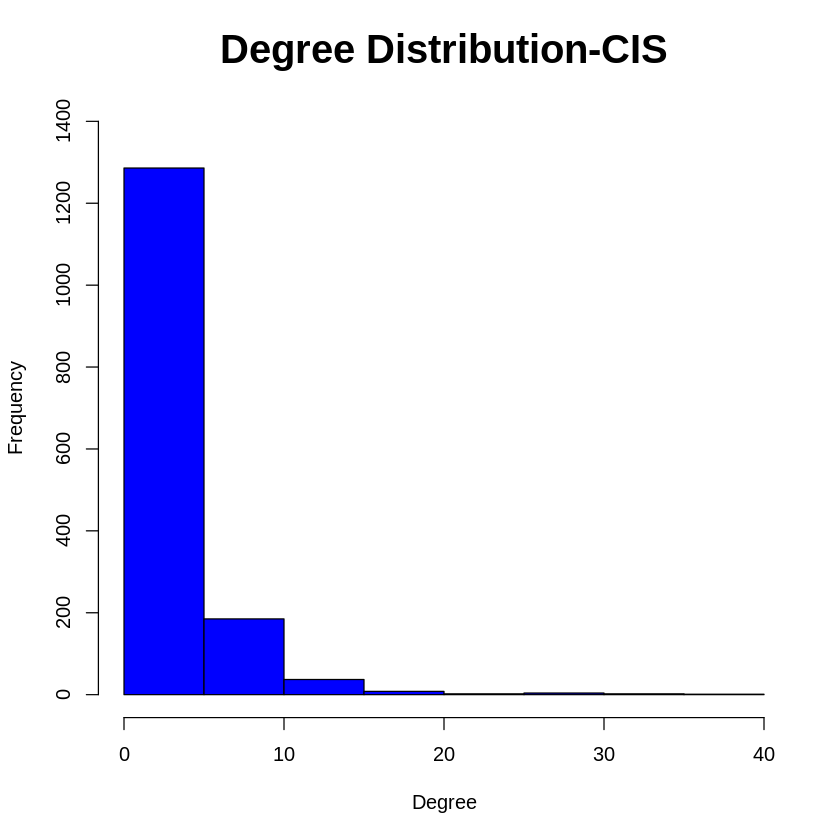

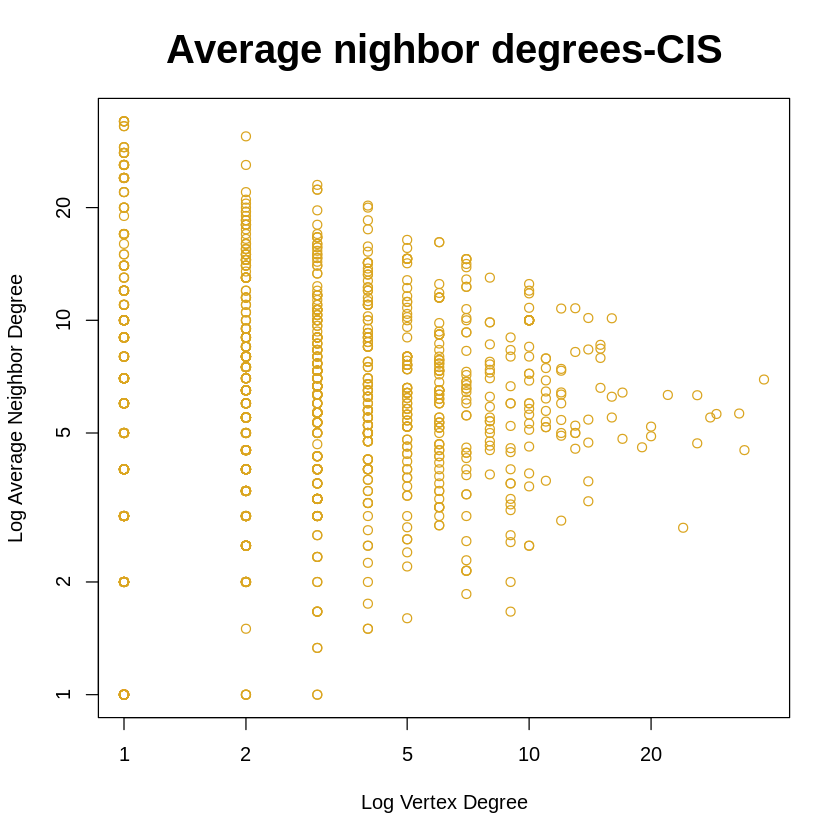

In [ ]:
#degree  Distribution
d1 <- degree(PRIN_NET,gmode="graph")
hist(d1,col="blue",
         xlab="Degree", ylab="Frequency",
         main="Degree Distribution-CIS", ylim=c(0, 1400),cex.main=2)

#Interpretation: While there is a substantial number 
#of nodes of quite low degree, there are also a trivial
#number of nodes with higher order of degree magnitudes.
#, a plot of average neighbor degree versus vertex degree
a.nn.deg.yeast <- graph.knn(PRIN_graph,V(PRIN_graph))$knn
plot(d1, a.nn.deg.yeast, log="xy",
col="goldenrod", xlab=c("Log Vertex Degree"),
ylab=c("Log Average Neighbor Degree"))
title(main="Average nighbor degrees-CIS", cex.main=2)

#Interpretation: The plot "Log Average Neighbor Degree" suggests that while there
# is a tendency of nodes of higher degrees to link with similar nodes,
# nodes of lower degree tend to link with nodes of both lower and higher degrees.

In [ ]:
#Degree Centrality 
str(degree(PRIN_NET))
summary(degree(PRIN_NET,gmode="graph"))

 num [1:1525] 10 2 4 2 4 4 4 4 4 2 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   3.323   4.000  38.000 

In [ ]:
#correlations among a set of centrality measures
df.prom <- data.frame(
deg = degree(PRIN_NET,gmode="graph"),
btw = betweenness(PRIN_NET,gmode="graph")
)

cor(df.prom)

deg       btw      
deg 1.0000000 0.7144851
btw 0.7144851 1.0000000

In [ ]:
#Subgroups
#clique.number() does not return the number of cliques, but the size of the largest clique
numclq<-clique.number(PRIN_graph)
numclq
#maximal.cliques(PRIN_graph,min=10)

lrgclq<-largest.cliques(PRIN_graph)
lrgclq

#italian resercher  :
#there are 465 nodes (cliques
#of size one) and 524 edges (cliques of size two), followed by 146 triangles (cliques
#of size three).
table(sapply(cliques(ll), length))

#cliques(PRIN_graph)

[1] 11

[[1]]
+ 11/1525 vertices, named, from 999c60d:
 [1] S0165 AC091 AC153 AC164 AC196 AC334 AC337 AC358 AC419 AC432 AC459



  1   2   3   4 
465 524 146  14 

Warning message in subgraph(PRIN_graph, lc[[1]]):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”
Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”


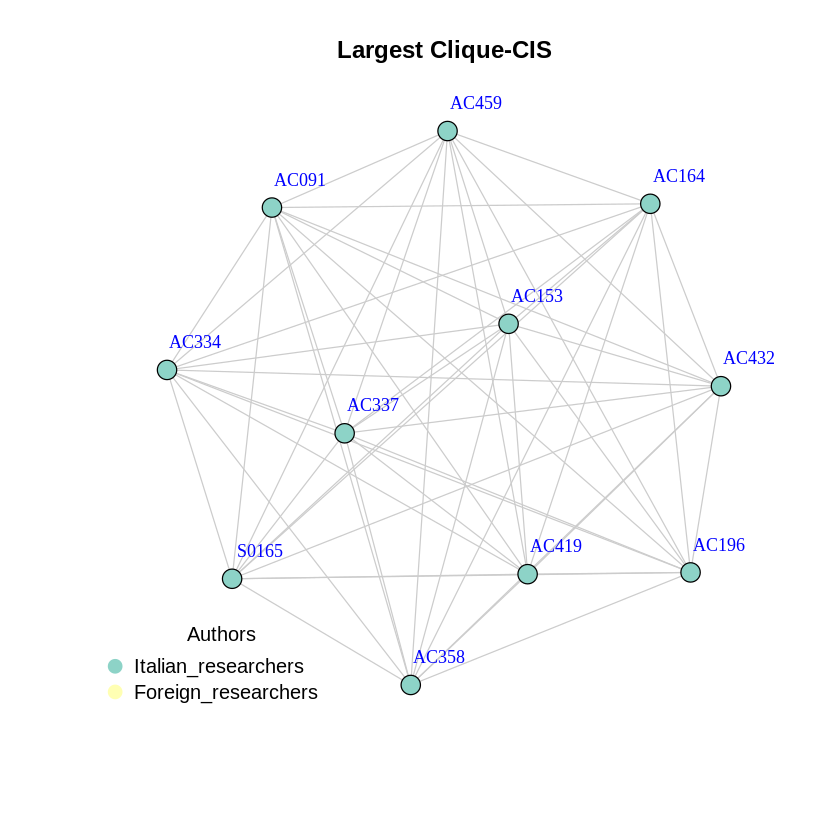

In [ ]:
#visulizing the largest clique.
# Assign largest cliques output to object 'lc'
lc <- largest_cliques(PRIN_graph)

# Create two new undirected subgraphs, each containing only the vertices of each largest clique.
gs1 <- as.undirected(subgraph(PRIN_graph, lc[[1]]))


# Plot the  largest cliques 

#par(mar=c(0,0,0,0))
my_color <- my_pal[as.numeric(as.factor(V(PRIN_graph)$Author.Type))]

V(gs1)$color <- my_color
plot(gs1,
     vertex.label.color = "blue", 
     vertex.label.cex = 0.9,
     vertex.size = 7,
     edge.color = 'gray80',
     main = "Largest Clique-CIS",
    vertex.label.dist=2,cex.main=4

)
legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="Authors")

In [ ]:
#A k-core is a maximal subgraph where each vertex is
# connected to at least k other
#vertices in the subgraph. 
#It returns a vector listing the highest core 
#that each vertex belongs to in the network.
#The results tell us the k-cores range from 1 to 5 for italian Authors. 
coreness <- graph.coreness(ll, mode="all")
table(coreness)
maxCoreness <- max(coreness) # THE NUMBER OF CORNESS IN GRAPH THAT IN THOS CASE IS 5
maxCoreness
f<- as.vector(unique(coreness))
f


In [ ]:
#it shows us the nodes in k core
cores = graph.coreness(as.undirected(PRIN_graph))
head(sort(cores, decreasing=TRUE), 10)

AC091 AC153 AC164 AC196 AC334 AC337 AC358 AC419 AC432 AC459 
   10    10    10    10    10    10    10    10    10    10

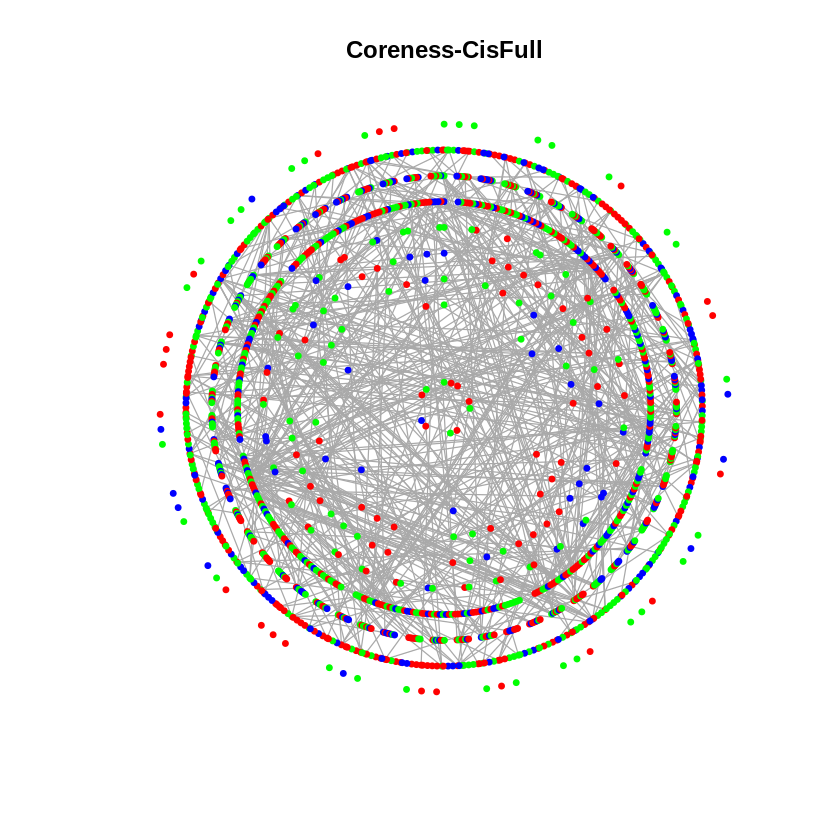

In [ ]:
#Creat layout
CorenessLayout <- function(g) {
coreness <- graph.coreness(g);
xy <- array(NA, dim=c(length(coreness), 2));
 
shells <- sort(unique(coreness));
for(shell in shells) {
v <- 1 - ((shell-1) / max(shells));
nodes_in_shell <- sum(coreness==shell);
angles <- seq(0,360,(360/nodes_in_shell));
angles <- angles[-length(angles)]; # remove last element
xy[coreness==shell, 1] <- sin(angles) * v;
xy[coreness==shell, 2] <- cos(angles) * v;
}
return(xy);
}

 
# g is the network
# compute coreness
coreness <- graph.coreness(ll);
# assign colors
colbar <- rainbow(max(coreness));
# create layout
lay <- CorenessLayout(PRIN_graph);
# plot
plot(ll,vertex.label=NA
, layout=lay, vertex.size=2,
 vertex.color=colbar[coreness],
vertex.frame.color=colbar[coreness], main='Coreness-CisFull');
#This figure shows that the not center of the network is made up of the
#highest k-core. In this case, the 5-core is comprised  of the total nodes.



[1] "AASSVE A"                   "ARBORETTI GIANCRISTOFARO R"
 [3] "ARIA M"                     "BALBI S"                   
 [5] "BALDI ANTOGNINI A"          "BARABESI L"                
 [7] "BARAGONA R"                 "BASSI F"                   
 [9] "BENEDETTI R"                "BERNI R"                   
[11] "BIGGERI A"                  "BIGGERI L"                 
[13] "BILANCIA M"                 "BINI M"                    
[15] "BLANGIARDO GC"              "BORRONI CG"                
[17] "BRACALENTE B"               "BRIZZI M"                  
[19] "CAMPOSTRINI S"              "CANTALUPPI G"              
[21] "CASTIGLIONI M"              "CONTINI D"                 
[23] "D AGOSTINO A"               "D AMBRA A"                 
[25] "D AMBRA L"                  "DI BATTISTA T"             
[27] "DURIO A"                    "FATTORINI L"               
[29] "FAVARO S"                   "FERRARI D"                 
[31] "FIGINI S"                   "FONSECA G"                 
[33] "FOSCHI P"                   "GASTALDI T"                
[35] "GIORDANO S"                 "GIORGI GM"                 
[37] "GOLINI A"                   "GRAZIANI R"                
[39] "GRILLENZONI C"              "IEZZI DF"                  
[41] "LA ROCCA L"                 "LAGAZIO C"                 
[43] "LOVAGLIO PG"                "MARAVALLE M"               
[45] "MARCHESELLI M"              "MAROZZI M"                 
[47] "MIGNANI S"                  "MINOZZO M"                 
[49] "MIRA A"                     "MOLA F"                    
[51] "MORLINI I"                  "MORTERA J"                 
[53] "MULIERE P"                  "MUSIO M"                   
[55] "NERI L"                     "NIGLIO M"                  
[57] "PACEI S"                    "PACILLO S"                 
[59] "PAGGIARO A"                 "PAGNOTTA SM"               
[61] "PAULI F"                    "PINNELLI A"                
[63] "RICCOMAGNO E"               "ROMANAZZI M"               
[65] "ROMANO MF"                  "SAMBUCINI V"               
[67] "SCHOIER G"                  "SCIANDRA M"                
[69] "TREVISANI M"                "TRIVELLATO U"              
[71] "TRIVISANO C"                "VARIN C"                   
[73] "VICARD P"                   "VITALE CD"                 
[75] "ZANI S"                     "CROCETTA C"                
[77] "D'ANGIO R"                  "HAAGEN K"                  
[79] "MINOTTI SC"                 "MUSSINO A"

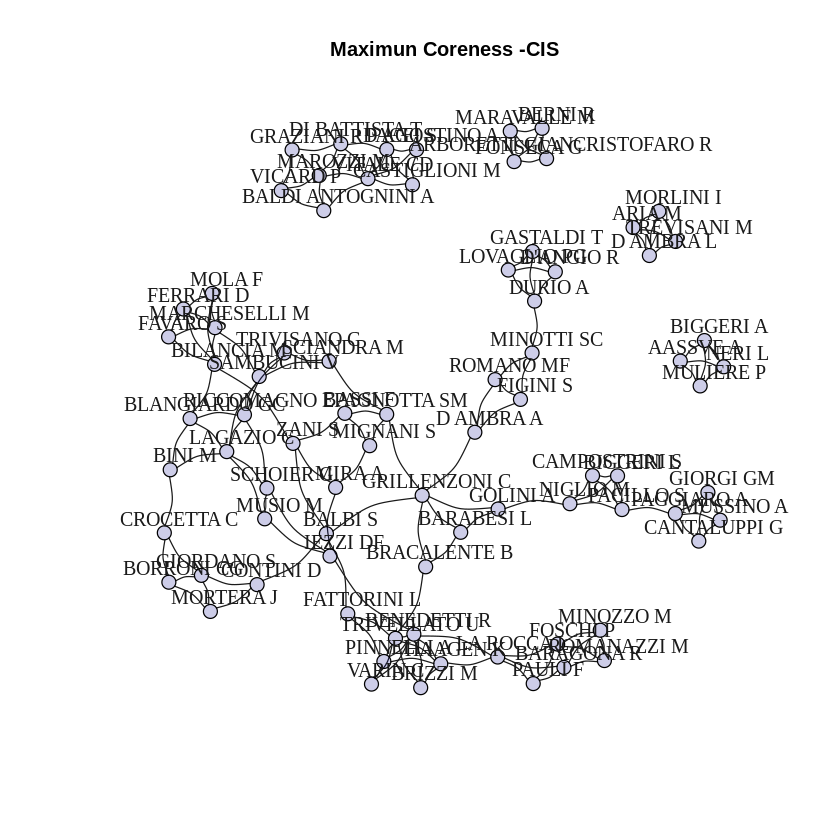

In [ ]:
#To find the authors with maximum coreness.
kcores <- coreness(ll)
verticesHavingMaxCoreness <- which(kcores == max(kcores)) 
V(ll)$Author[verticesHavingMaxCoreness]
#To plot authors with maximum core. 
# Add edge attribute id values
E(ll)$id <- seq(ecount(ll))
# Extract subgraph
MaxCorenessPlot <- induced.subgraph(graph=ll,vids=verticesHavingMaxCoreness)
#Plot subgraph
plot(MaxCorenessPlot,vertex.color=rgb(0,0,139,alpha=50,maxColorValue=255),
vertex.size=5,edge.color="gray10", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,
vertex.label.dist=1,
     pad=0.9,
     edge.arrow.size=.1,
     vertex.label.color ="gray10",
     vertex.label.cex=1,
     vertex.label=V(ll)$Author[verticesHavingMaxCoreness])
title(main="Maximun Coreness -CIS", cex.main=1)

In [ ]:
kcores <- coreness(ll)
max(kcores)

[1] 3

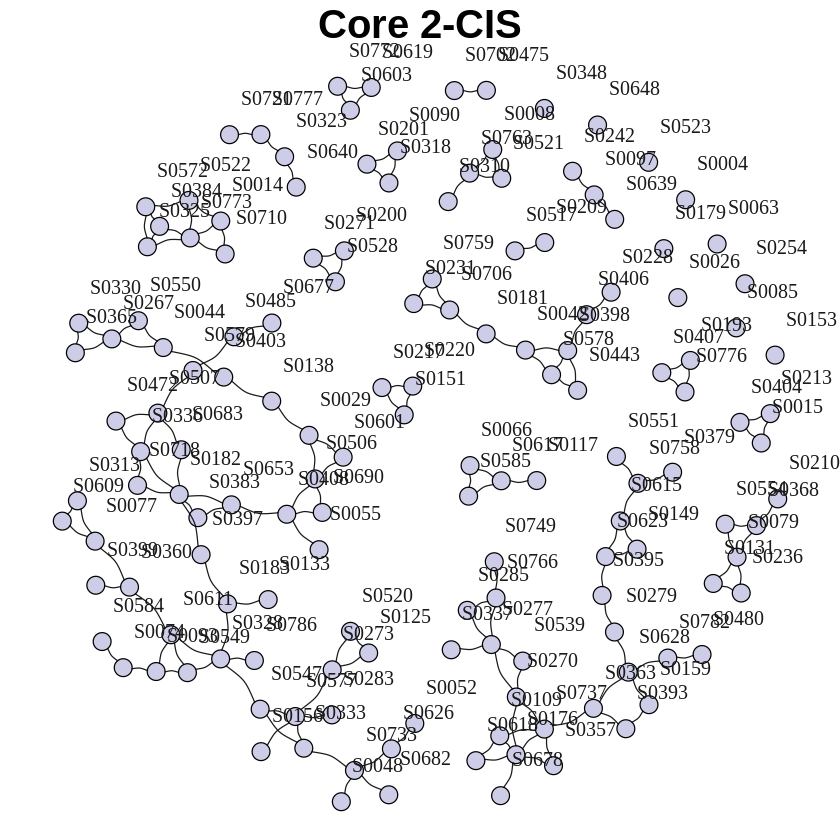

In [ ]:
#for italian data set , i plot core 2
coreness <- graph.coreness(ll)
#V(PRIN_graph)$name <- coreness
par(mar=c(0,0,2,0))

iD <- ll
iD <- induced.subgraph(ll,vids=which(coreness ==2))

plot(iD,vertex.color=rgb(0,0,139,alpha=50,maxColorValue=255),
vertex.size=5,edge.color="gray10", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,
vertex.label.dist=2,
     pad=0.9,
     edge.arrow.size=.1,
     vertex.label.color ="gray10",
     vertex.label.cex=1)

title(main="Core 2-CIS", cex.main=2)


In [ ]:
COM <- decompose.graph(PRIN_graph)
#A census of all connected components within this graph, however, shows that there
#clearly is a giant componentwith 1277 vertices, 
#This  component contains more than 90% of the vertices in the network.

table(sapply(COM, vcount))

COM.gc <- decompose.graph(PRIN_graph)[[1]]#get giant component
#e average path length in the giant component is barely greater than 7
average.path.length(COM.gc)[[1]]
#n the longest of path of giant component
diameter(COM.gc)
#In the case of the giant component of the  network, the vertex and edge
#connectivity are both equal to one.
#Thus it requires the removal of only a single well-chosen vertex or edge in order to
#break this subgraph into additional components.
vertex.connectivity(COM.gc)
edge.connectivity(COM.gc)
#In the giant component of the data network,272
#vertices are cut vertices
P.cut.vertices <- articulation.points(COM.gc)
length(P.cut.vertices)


   1    2    3    4    5    6    7    8   11   13   14 1277 
  60   29    8    6    3    1    1    2    1    1    1    1 

[1] 7.153008

[1] 19

[1] 1

[1] 1

[1] 272

In [ ]:
COM

[[1]]
IGRAPH 9520128 UNW- 1277 2299 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), weight (e/n)
+ edges from 9520128 (vertex names):
 [1] A0013--A0936 A0013--A1828 A0013--S0063 A0013--S0075 A0013--S0348
 [6] A0016--S0138 A0018--S0008 A0018--S0639 A0035--AC474 A0035--S0394
[11] A0045--A1487 A0045--S0716 A0057--A2146 A0057--S0280 A0058--A1111
[16] A0058--S0698 A0059--S0085 A0059--S0662 A0064--S0033 A0074--S0159
[21] A0074--S0628 A0086--S0023 A0086--S0187 A0086--S0662 A0089--A2077
[26] A0089--S0055 A0089--S0071 A0096--S0054 A0096--S0773 A0098--AC237
+ ... omitted several edges

[[2]]
IGRAPH 7187ccf UNW- 4 3 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), weight (e/n)
+ edges from 7187ccf (vertex names):
[1] A0034--S0163 AC187--S0163 AC375--S0163

[[3]]
IGRAPH 8b3c99c UNW- 2 1 -- 
+ a

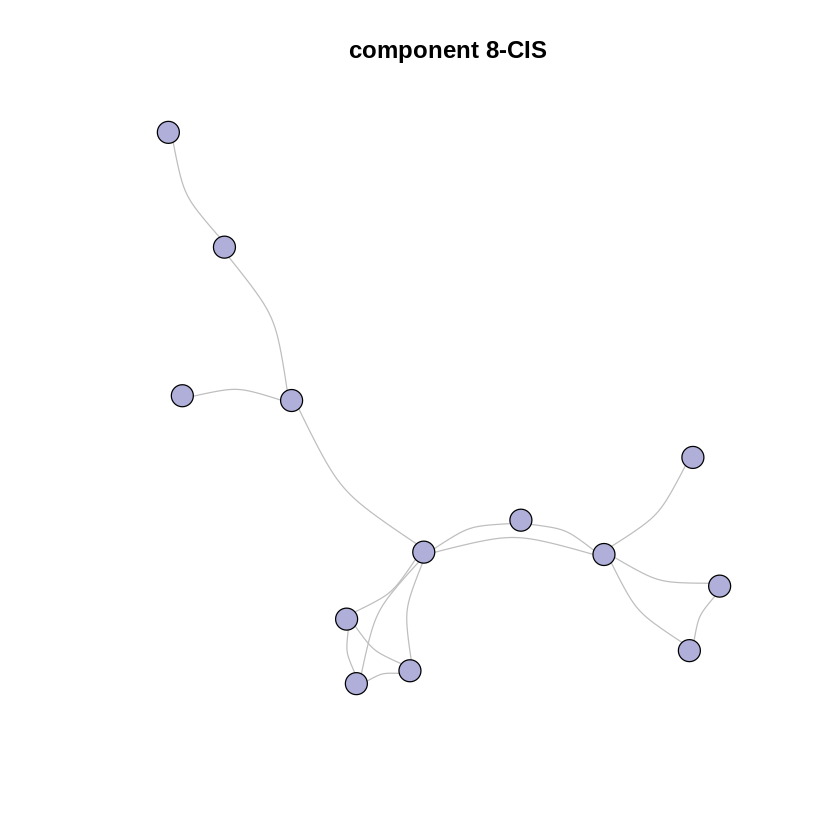

In [ ]:
#Vidualizing  component. # 8 
par(mfrow=c(1,1))

plot(COM[[8]], vertex.size=8, vertex.label=NA,vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,main=" component 8-CIS")


The basic workflow for conducting community detection in igraph is to run
one of the community detection functions on a network and store the results in
a communities class object.
Then, the identified subgroups in the network can
be explored using a number of igraph functions that know how to operate with
communities objects. The networks can also be plotted easily to show the results
of the community detection.

In [ ]:
#From graph, I extract all clusters 

modules <- decompose.graph(PRIN_graph)
out <- modules[order(sapply(modules, ecount), decreasing=T)]
length(out)
out
#min.vertices = 10 # I could also put treshhold
#a quick glance at plot reveals that this graph is not composed
# of a single connected component.
#So 1277 of the nodes are in a single large component and the
# remaining  are in 113 small components. The 1277 nodes in
# the big component overwhelm the smaller components and the 113 
#small components acts as visual clutter for the big component.
# Let's separate the 133 small components.

[1] 114

[[1]]
IGRAPH 12218e3 UNW- 1277 2299 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), color
| (v/c), weight (e/n)
+ edges from 12218e3 (vertex names):
 [1] A0013--A0936 A0013--A1828 A0013--S0063 A0013--S0075 A0013--S0348
 [6] A0016--S0138 A0018--S0008 A0018--S0639 A0035--AC474 A0035--S0394
[11] A0045--A1487 A0045--S0716 A0057--A2146 A0057--S0280 A0058--A1111
[16] A0058--S0698 A0059--S0085 A0059--S0662 A0064--S0033 A0074--S0159
[21] A0074--S0628 A0086--S0023 A0086--S0187 A0086--S0662 A0089--A2077
[26] A0089--S0055 A0089--S0071 A0096--S0054 A0096--S0773 A0098--AC237
+ ... omitted several edges

[[2]]
IGRAPH ac76c1f UNW- 11 55 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), color
| (v/c), weight (e/n)
+ edges from ac76c1f (vertex names):
 [1] AC091--AC153 AC091--AC164 AC153--AC164 AC091--AC196 AC153--AC196
 [6] AC

In [ ]:
install.packages("rainbow")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pcaPP’, ‘hdrcde’, ‘ks’




In [ ]:
head(modules)[1:3]

[[1]]
IGRAPH 80c73fe UNW- 1277 2299 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), weight (e/n)
+ edges from 80c73fe (vertex names):
 [1] A0013--A0936 A0013--A1828 A0013--S0063 A0013--S0075 A0013--S0348
 [6] A0016--S0138 A0018--S0008 A0018--S0639 A0035--AC474 A0035--S0394
[11] A0045--A1487 A0045--S0716 A0057--A2146 A0057--S0280 A0058--A1111
[16] A0058--S0698 A0059--S0085 A0059--S0662 A0064--S0033 A0074--S0159
[21] A0074--S0628 A0086--S0023 A0086--S0187 A0086--S0662 A0089--A2077
[26] A0089--S0055 A0089--S0071 A0096--S0054 A0096--S0773 A0098--AC237
+ ... omitted several edges

[[2]]
IGRAPH 410112d UNW- 4 3 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), size
| (v/n), weight (e/n)
+ edges from 410112d (vertex names):
[1] A0034--S0163 AC187--S0163 AC375--S0163

[[3]]
IGRAPH af92dc5 UNW- 2 1 -- 
+ a

In [ ]:
vertexes <- character()
data_frames <- list()
for(i in 2:length(out)) {
  vertexes[i] <- list(vertex.attributes(out[[i]])$name)
  data_frames[[i]] <- get.data.frame(out[[i]])
}
sub_nodes = unlist(vertexes)
subv <- sub_nodes
g3 <- induced.subgraph(graph=PRIN_graph,vids=subv)
g4<-asNetwork(g3)
rescale <- function(nchar,low,high) {
min_d <- min(nchar)
max_d <- max(nchar)
rscl <- ((high-low)*(nchar-min_d))/(max_d-min_d)+low
rscl
}



In [ ]:
#I can calculate the betweenness of this  graph and display the outcome:
wc <- edge.betweenness.community(g3, weights = NULL
                                 ,directed = FALSE,bridges = TRUE)


#This splits up each sub cluster as a community.



IGRAPH clustering edge betweenness, groups: 113, mod: 0.91
+ groups:
  $`1`
  [1] "A0034" "AC187" "AC375" "S0163"
  
  $`2`
  [1] "A0127" "S0086"
  
  $`3`
  [1] "A0183" "A1338" "A1486" "S0041" "S0704"
  
  $`4`
  + ... omitted several groups/vertices

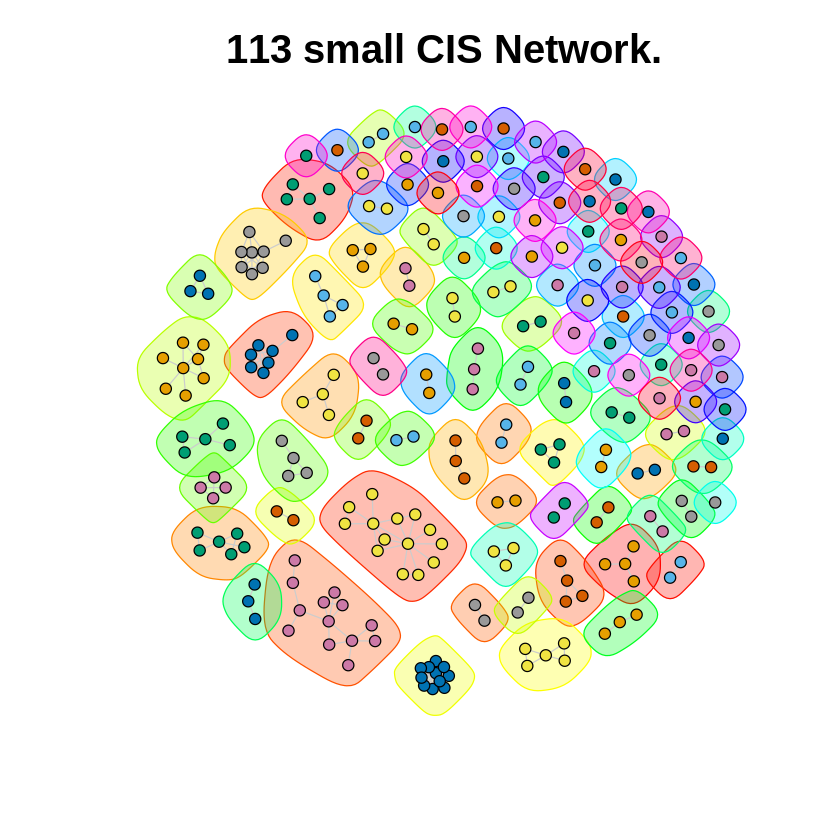

In [ ]:
## Let's separate the 113 small components.
plot(wc, g3, vertex.size=4,
edge.color="gray80",
     vertex.label=NA)
     title(main="113 small CIS Network.", cex.main=2)


In [ ]:
vertexes <- character()
data_frames <- list()
for(i in 1:1) {
  vertexes[i] <- list(vertex.attributes(out[[i]])$name)
  data_frames[[i]] <- get.data.frame(out[[i]])
}
sub_nodes = unlist(vertexes)
subv <- sub_nodes
LargeComp <- induced.subgraph(graph=PRIN_graph,vids=subv)
g6<-asNetwork(LargeComp)
rescale <- function(nchar,low,high) {
min_d <- min(nchar)
max_d <- max(nchar)
rscl <- ((high-low)*(nchar-min_d))/(max_d-min_d)+low
rscl
}

In [ ]:
#There are several community detection algorithm.
#The best result is given by Louvain and  Girvan-newman(edge betweeness) algorithms.
# I will implement Girvan-newman(edge betweeness) algorithms.
wc <- fastgreedy.community(LargeComp)
modularity(wc)

wc <- edge.betweenness.community(LargeComp)
modularity(wc)

wc <- leading.eigenvector.community(LargeComp)
modularity(wc)

wc <- label.propagation.community(LargeComp)
modularity(wc)

wc <- cluster_louvain(LargeComp)
modularity(wc)

[1] 0.8658574

Warning message in edge.betweenness.community(LargeComp):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”
Warning message in edge.betweenness.community(LargeComp):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”


[1] 0.8693496

[1] 0.8083846

[1] 0.7755881

[1] 0.8721597

In [ ]:
LC.gn.comm <- edge.betweenness.community(LargeComp, weights = NULL
                                 ,directed = FALSE,bridges = TRUE)
max(LC.gn.comm$membership)


#it found 31 cluster.


[1] 31

In [ ]:
LC.gn.comm

IGRAPH clustering edge betweenness, groups: 31, mod: 0.87
+ groups:
  $`1`
   [1] "A0013" "A0074" "A0275" "A0291" "A0438" "A0527" "A0675" "A0879" "A0891"
  [10] "A0919" "A0934" "A0936" "A1042" "A1068" "A1119" "A1207" "A1460" "A1494"
  [19] "A1500" "A1503" "A1644" "A1664" "A1695" "A1814" "A1828" "A2137" "A2174"
  [28] "A2230" "AC014" "AC022" "AC064" "AC070" "AC101" "AC111" "AC115" "AC162"
  [37] "AC194" "AC195" "AC201" "AC236" "AC280" "AC302" "AC304" "AC345" "AC418"
  [46] "AC449" "AC452" "AC464" "AC475" "AC477" "AC492" "S0034" "S0063" "S0070"
  [55] "S0072" "S0075" "S0116" "S0159" "S0162" "S0172" "S0199" "S0207" "S0279"
  [64] "S0305" "S0323" "S0338" "S0346" "S0348" "S0349" "S0352" "S0362" "S0377"
  [73] "S0392" "S0393" "S0456" "S0463" "S0501" "S0534" "S0540" "S0542" "S0580"
  + ... omitted several groups/vertices

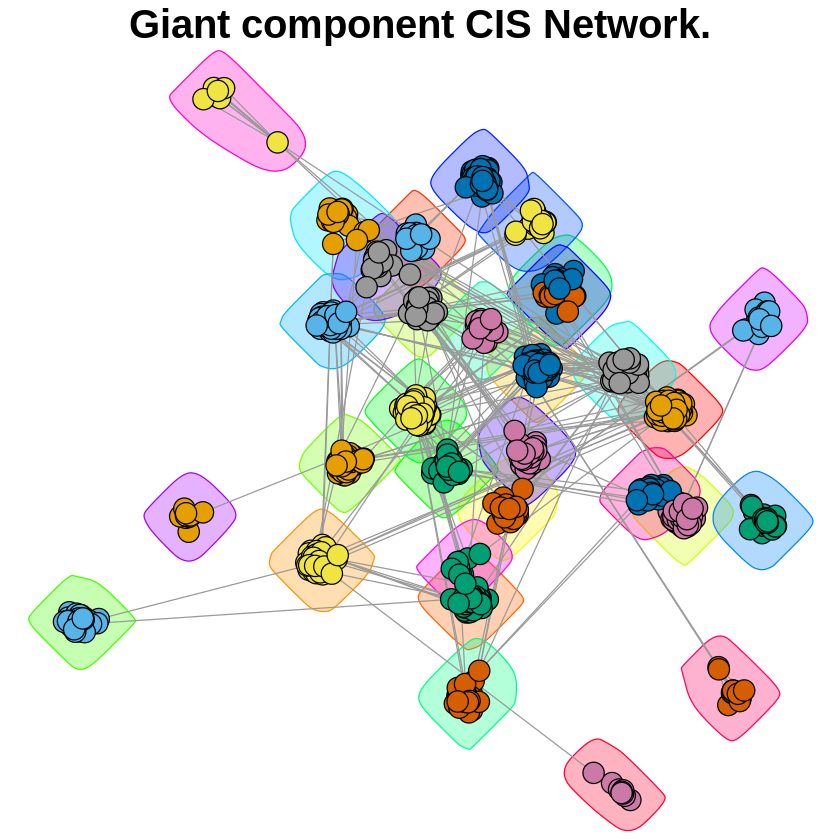

In [ ]:
#we can position vertices in the same community group together and 
#make different communities stay further apart.
LC_Grouped = LargeComp
E(LC_Grouped)$weight = 1
for(i in unique(membership(LC.gn.comm))) {
    GroupV = which(membership(LC.gn.comm) == i)
    LC_Grouped = add_edges(LC_Grouped, combn(GroupV, 2), attr=list(weight=6))
} 

set.seed(1234)
LO = layout_with_fr(LC_Grouped)
colors <- rainbow(max(membership(LC.gn.comm)))
par(mar=c(0,0,2,0))
plot(LC.gn.comm, LargeComp, layout=LO,
    vertex.size = 6, 
    vertex.color=colors[membership(LC.gn.comm)], 
    vertex.label = NA, edge.width = 1,edge.color="gray60")

         title(main="Giant component CIS Network.",sub="Girvan-Newman Algorithm", cex.main=2)


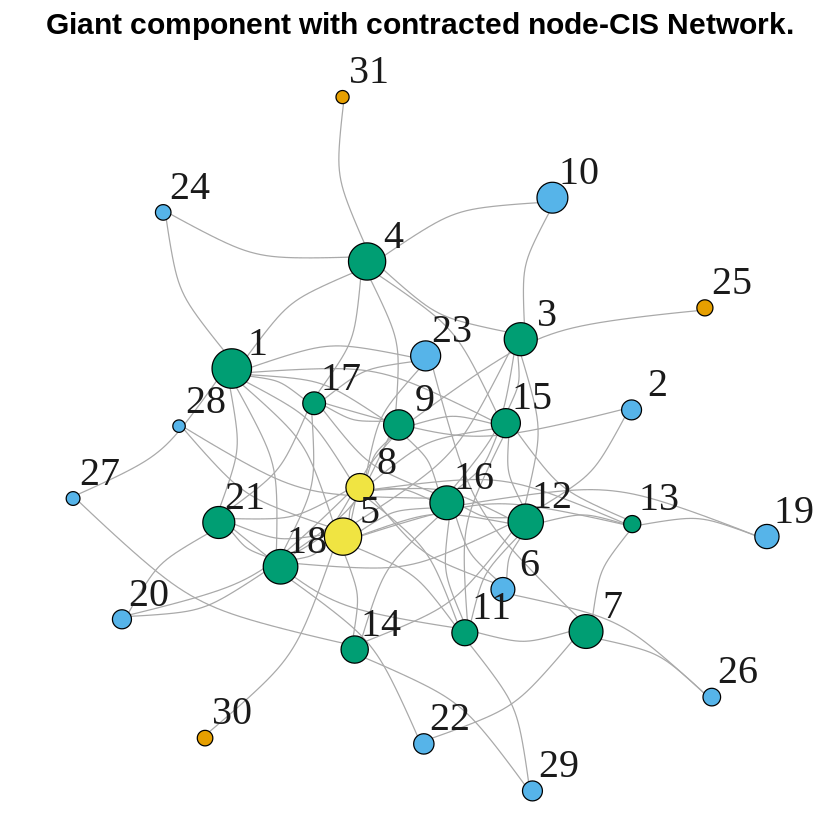

In [ ]:
#Contract the Communities

#Just plot a single node for each community. Here,
# I make the area of each community vertex proportional
# to the number of members of that community 
#I colored the vertices using a coarse grouping based on their degrees.
GN.Comm = simplify(contract(LargeComp, membership(LC.gn.comm)))
D<- unname(igraph::degree(GN.Comm))

set.seed(1234)
par(mar=c(0,0,2,0))
plot(GN.Comm, vertex.size=sqrt(sizes(LC.gn.comm))*1.2,
    vertex.label=1:31, vertex.cex = 2,
   vertex.color=round(log(D))+1,
   layout=layout.lgl,  vertex.label.cex=2,edge.curved=0.3, 
   vertex.label.color ="gray10",vertex.label.dist=1.5
)
title(main="Giant component with contracted node-CIS Network.",sub="Girvan-Newman Algorithm", cex.main=1.5)


In [ ]:
#I calculate the betweenness of each subgraph by doing:
#Community Structure Detection Based On Edge Betweenness
#Many networks consist of modules which are densely connected 
#themselves but sparsely connected to other modules.

#Girvan-Newman produces 43 communities within this large component

betweenness_sub <- list()
for(i in 1:length(out)) {
  btws <- edge.betweenness.community(out[[i]], weights = NULL
                                                   ,directed = FALSE,bridges = TRUE)
  print(btws)
  betweenness_sub[[i]] <- btws
}

IGRAPH clustering edge betweenness, groups: 31, mod: 0.87
+ groups:
  $`1`
   [1] "A0013" "A0074" "A0275" "A0291" "A0438" "A0527" "A0675" "A0879" "A0891"
  [10] "A0919" "A0934" "A0936" "A1042" "A1068" "A1119" "A1207" "A1460" "A1494"
  [19] "A1500" "A1503" "A1644" "A1664" "A1695" "A1814" "A1828" "A2137" "A2174"
  [28] "A2230" "AC014" "AC022" "AC064" "AC070" "AC101" "AC111" "AC115" "AC162"
  [37] "AC194" "AC195" "AC201" "AC236" "AC280" "AC302" "AC304" "AC345" "AC418"
  [46] "AC449" "AC452" "AC464" "AC475" "AC477" "AC492" "S0034" "S0063" "S0070"
  [55] "S0072" "S0075" "S0116" "S0159" "S0162" "S0172" "S0199" "S0207" "S0279"
  [64] "S0305" "S0323" "S0338" "S0346" "S0348" "S0349" "S0352" "S0362" "S0377"
  [73] "S0392" "S0393" "S0456" "S0463" "S0501" "S0534" "S0540" "S0542" "S0580"
  + ... omitted several groups/vertices
IGRAPH clustering edge betweenness, groups: 1, mod: 0
+ groups:
  $`1`
   [1] "AC091" "AC153" "AC164" "AC196" "AC334" "AC337" "AC358" "AC419" "AC432"
  [10] "AC459" "S0165"
 

In [ ]:
head(betweenness_sub)

[[1]]
IGRAPH clustering edge betweenness, groups: 43, mod: 0.89
+ groups:
  $`1`
   [1] "S0001" "A0022" "A0039" "A0047" "A0060" "A0093" "A0110" "A0177" "A0183"
  [10] "A0198" "S0074" "S0089" "S0095" "S0104" "A0276" "A0410" "S0174" "A0589"
  [19] "A0601" "A0605" "A0638" "A0643" "A0646" "A0665" "A0679" "A0732" "A0779"
  [28] "A0825" "S0289" "A0836" "A0864" "A0875" "A0879" "A0895" "S0344" "A1040"
  [37] "A1064" "A1068" "S0375" "A1099" "A1105" "A1109" "A1115" "A1125" "A1127"
  [46] "A1180" "A1183" "A1217" "A1237" "A1245" "A1252" "S0456" "S0462" "A1340"
  [55] "S0463" "S0467" "A1374" "A1385" "A1460" "A1471" "S0533" "A1499" "A1506"
  [64] "A1531" "A1577" "A1613" "S0584" "A1662" "S0607" "A1693" "A1695" "A1721"
  [73] "A1745" "S0625" "A1781" "A1797" "A1814" "A1852" "S0667" "A1944" "A1970"
  + ... omitted several groups/vertices

[[2]]
IGRAPH clustering edge betweenness, groups: 7, mod: 0.11
+ groups:
  $`1`
  [1] "A0051" "A0199" "A0493" "A1284"
  
  $`2`
   [1] "A0210" "A0299" "A0331" "A0374" 

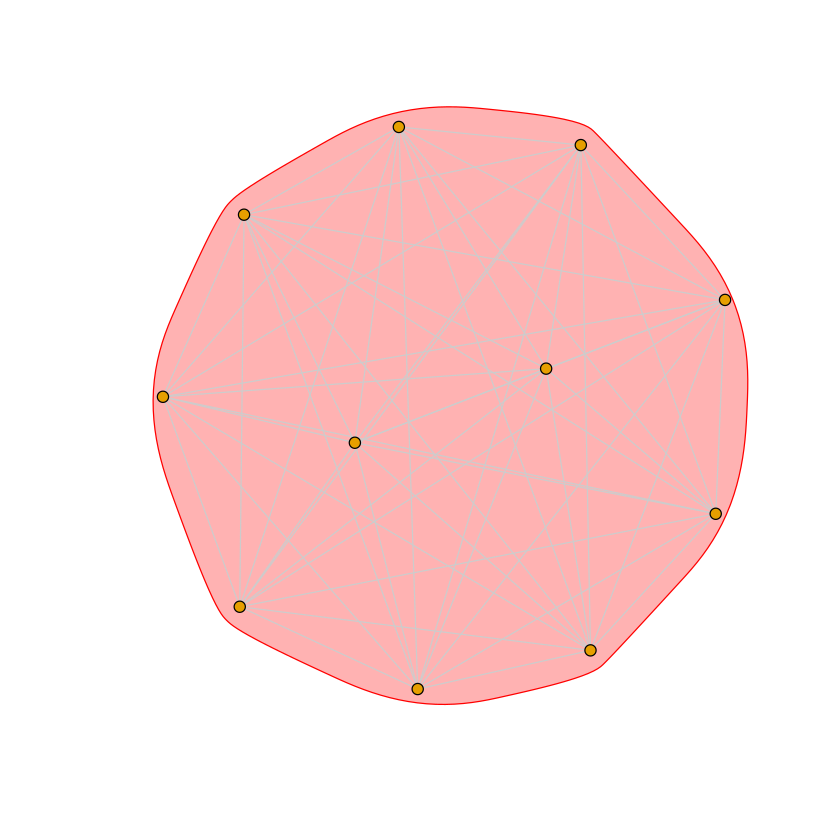

In [ ]:
#Whereas, if we consider the biggest cluster individually, we get:
#I can plot these individually by doing:
plot(betweenness_sub[[2]], out[[2]], vertex.size=4,
edge.color="gray80",vertex.label=NA, layout=layout.kamada.kawai)



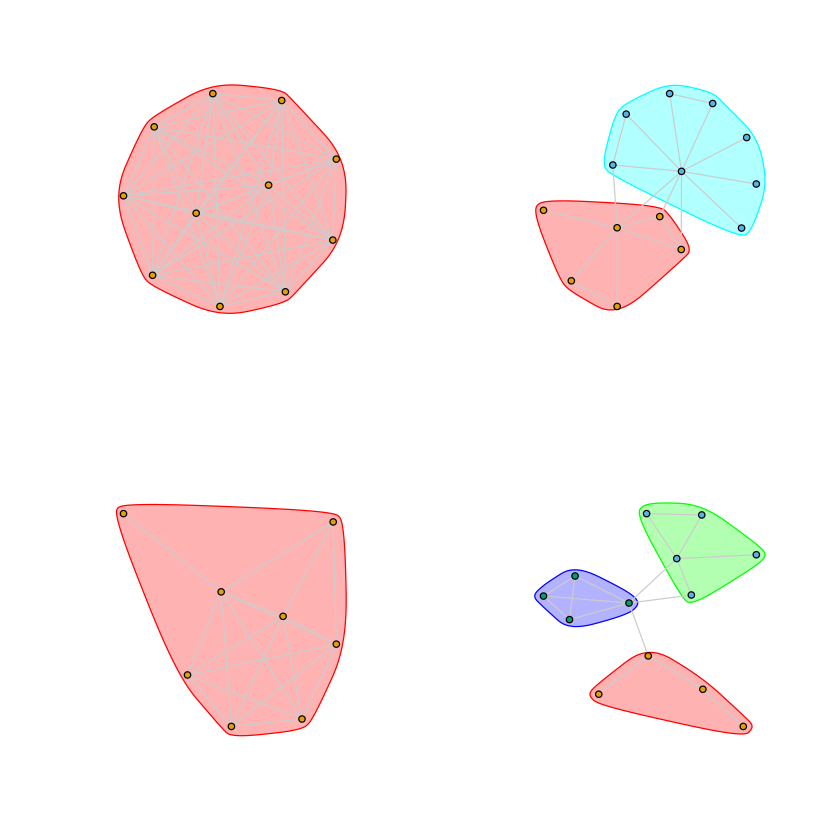

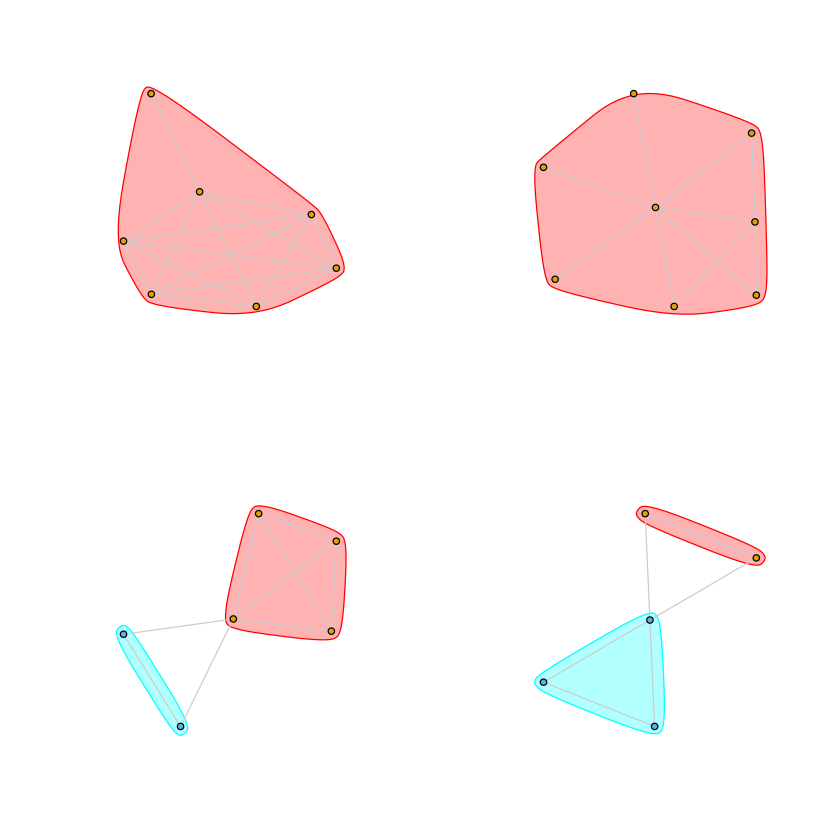

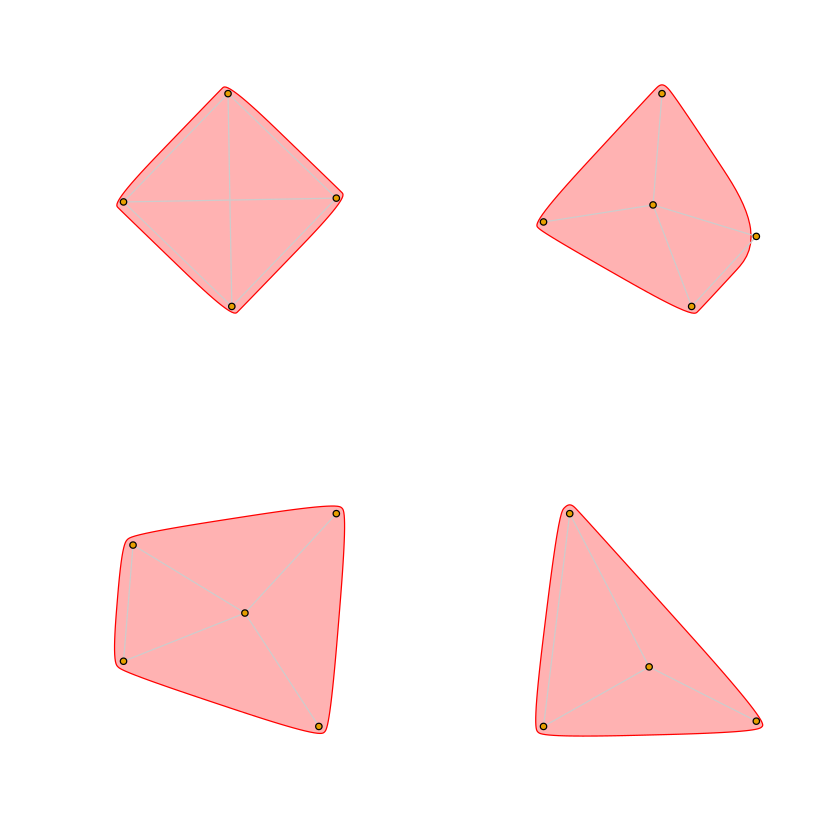

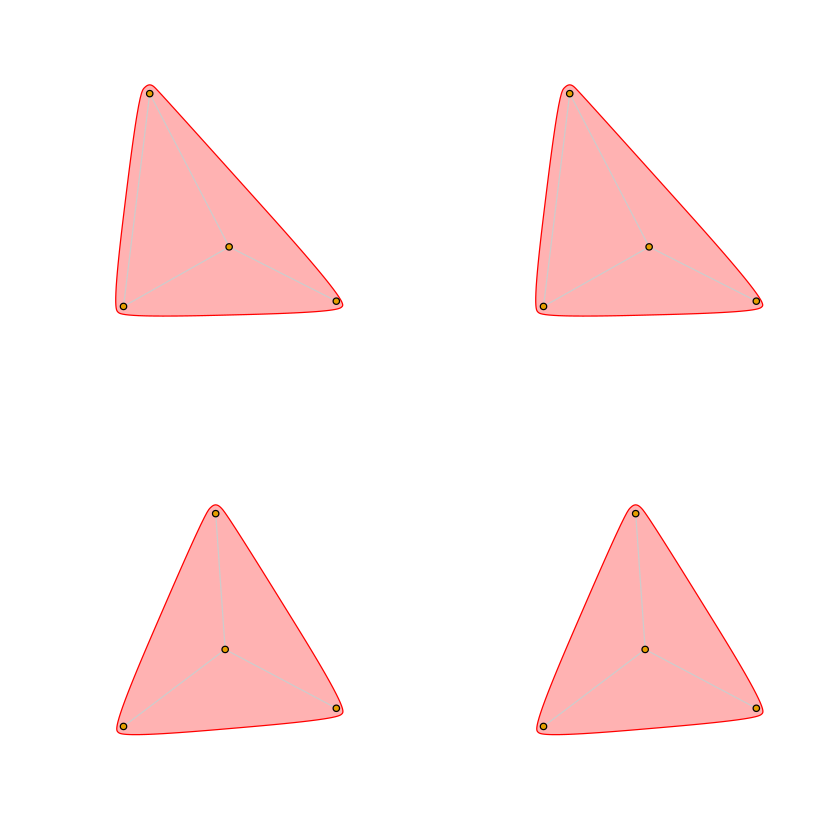

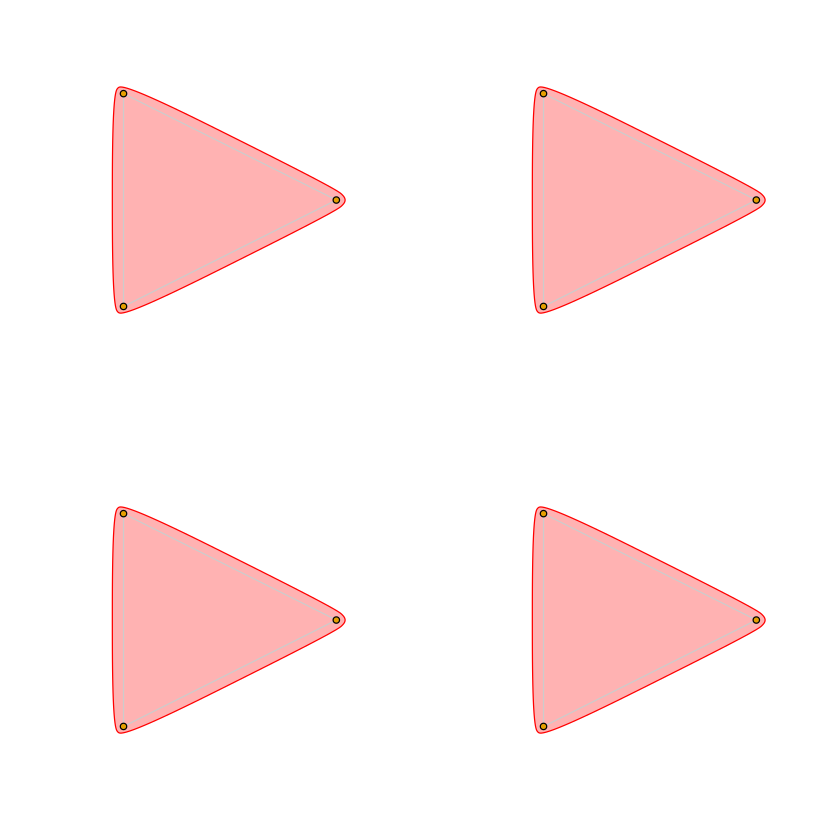

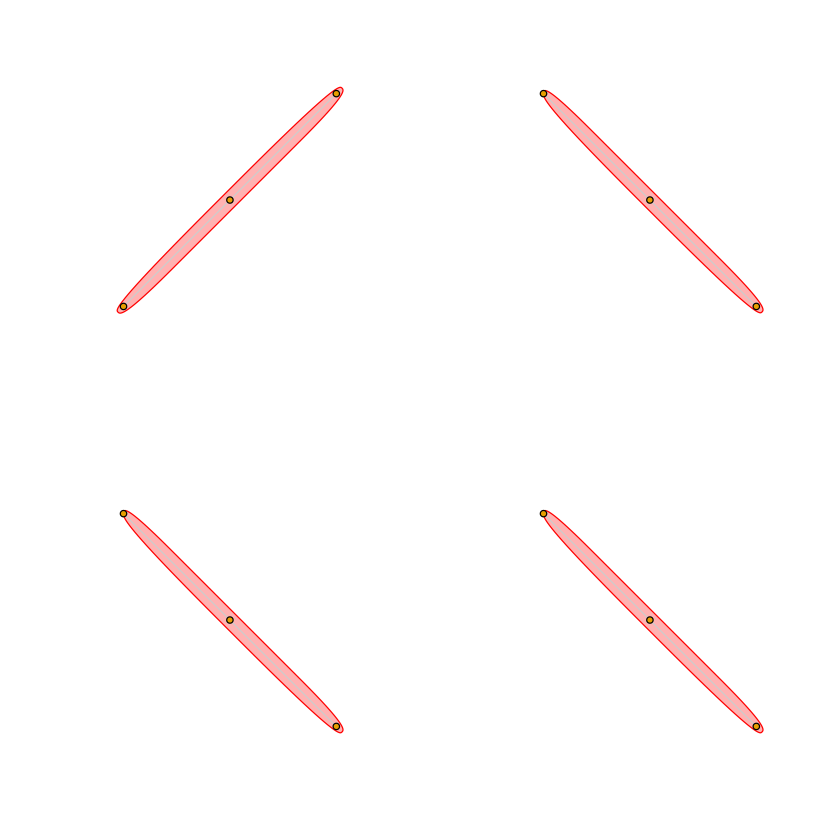

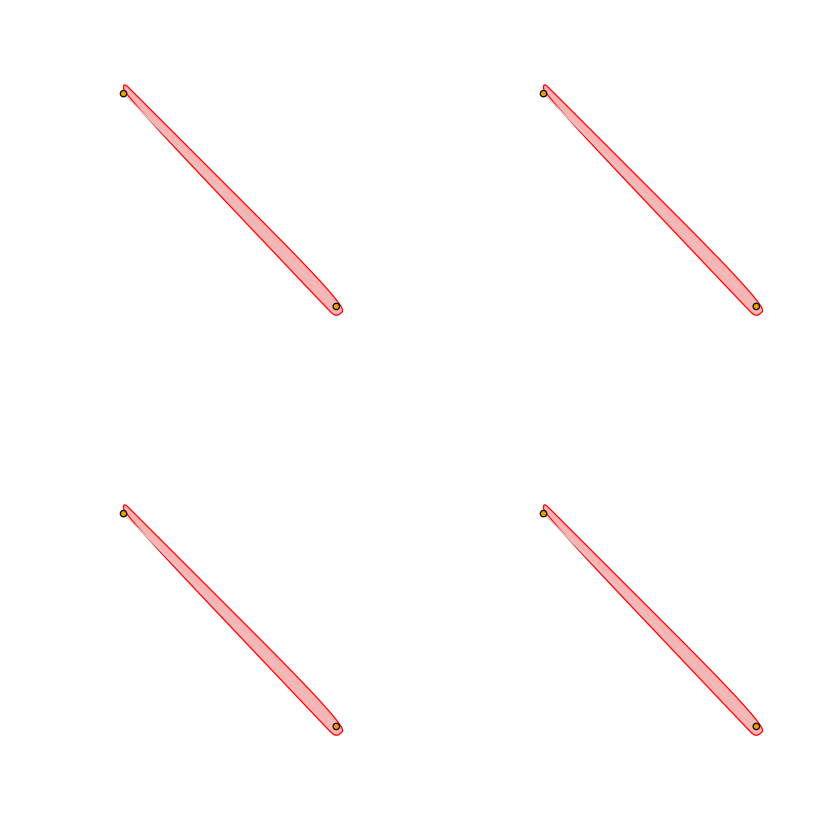

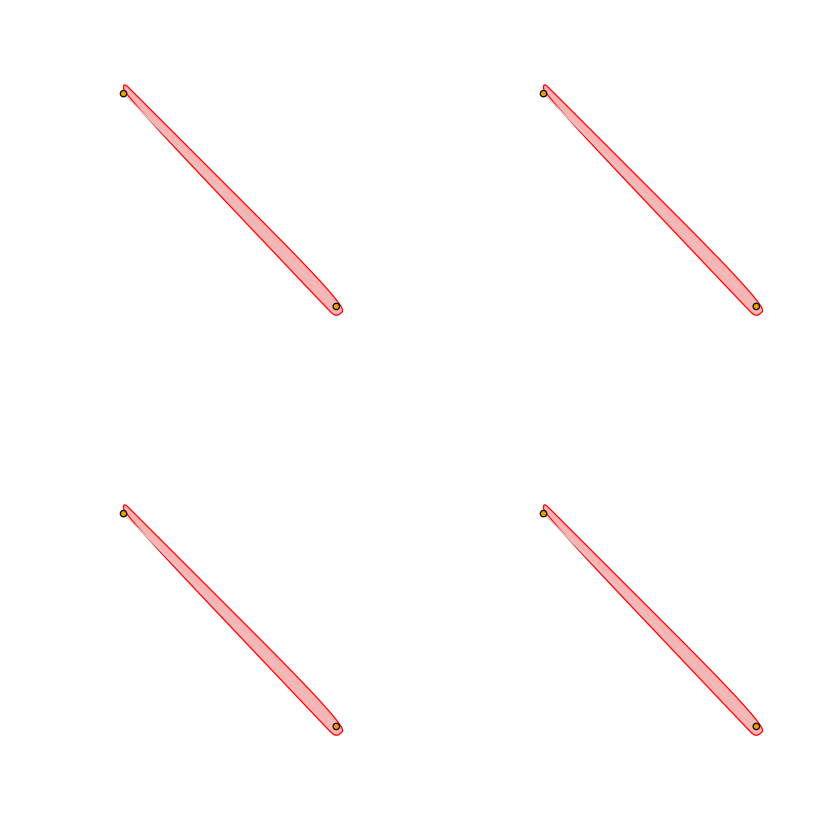

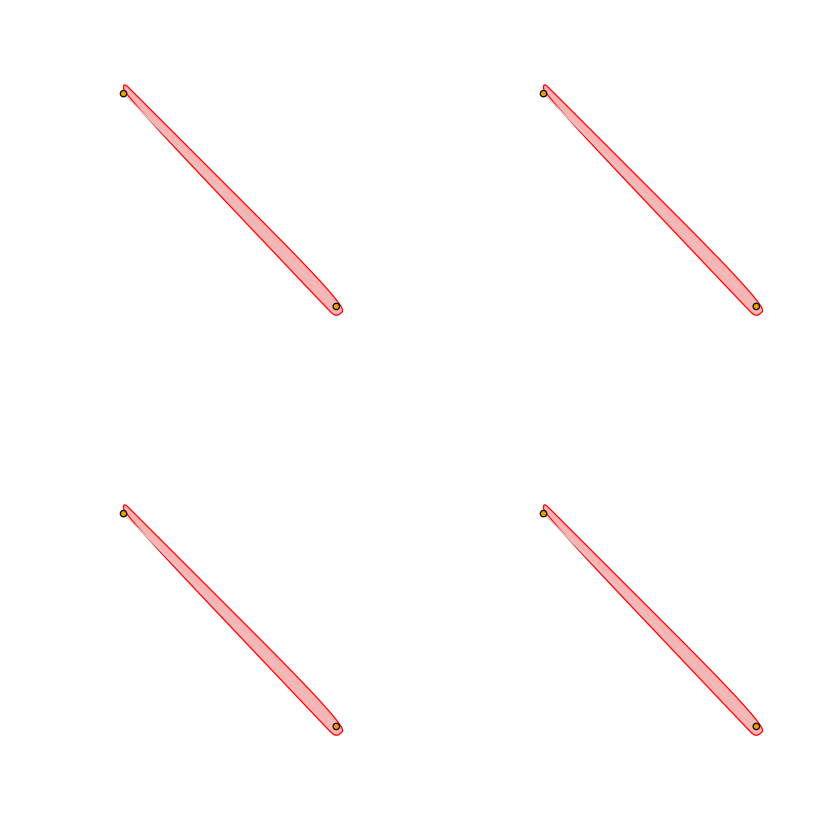

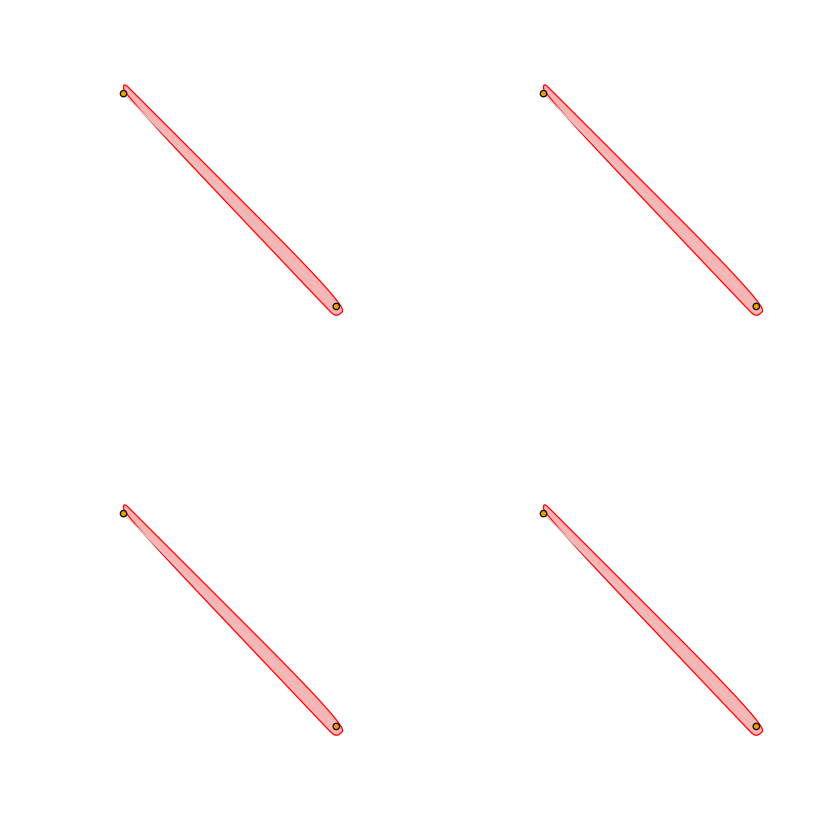

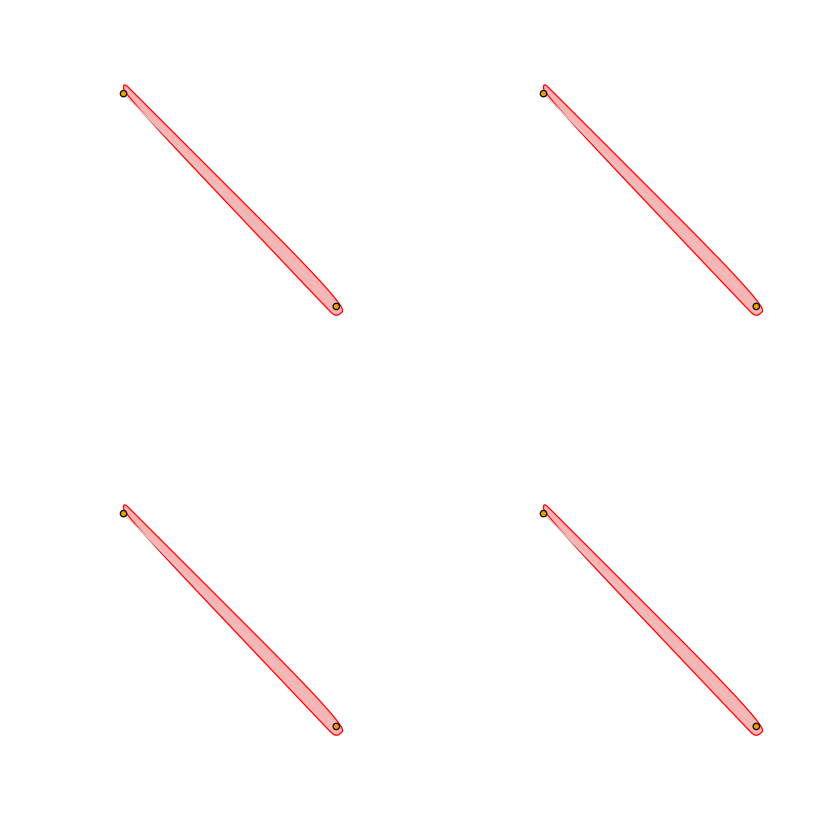

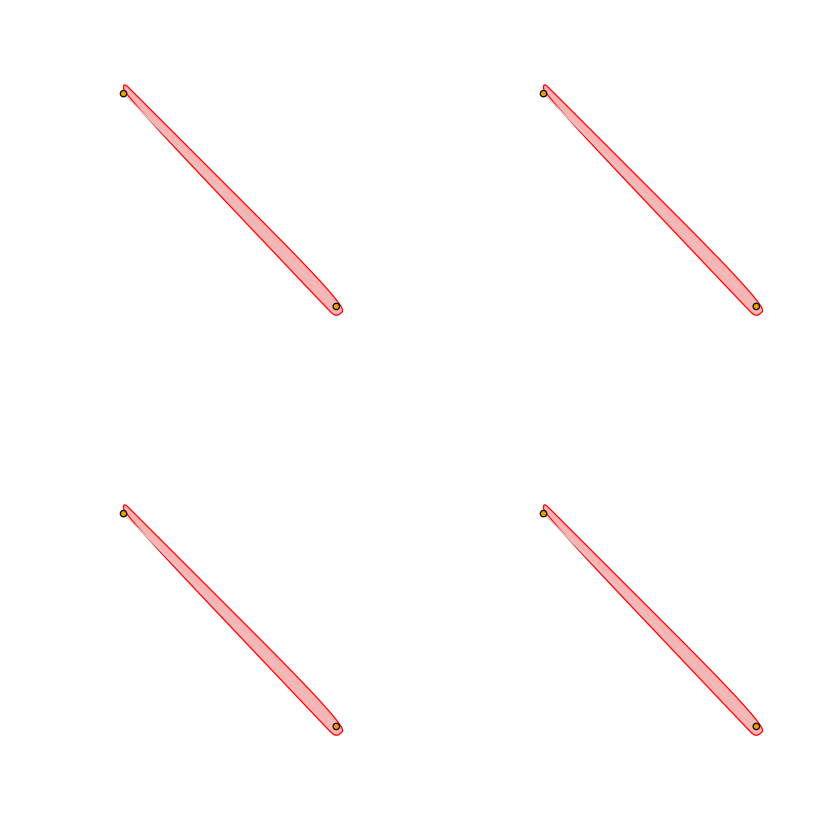

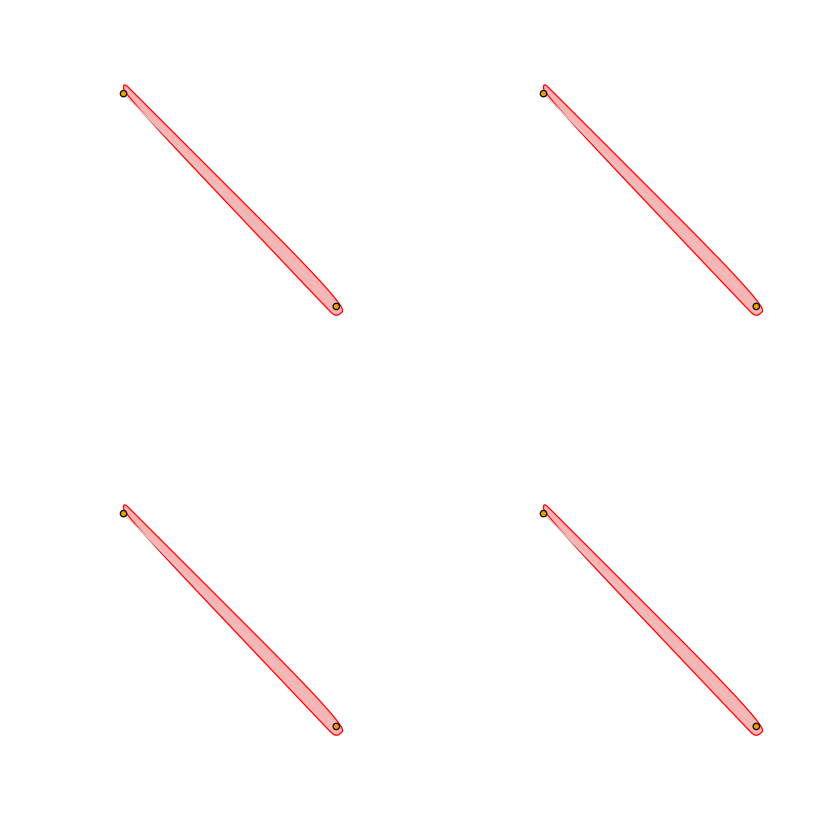

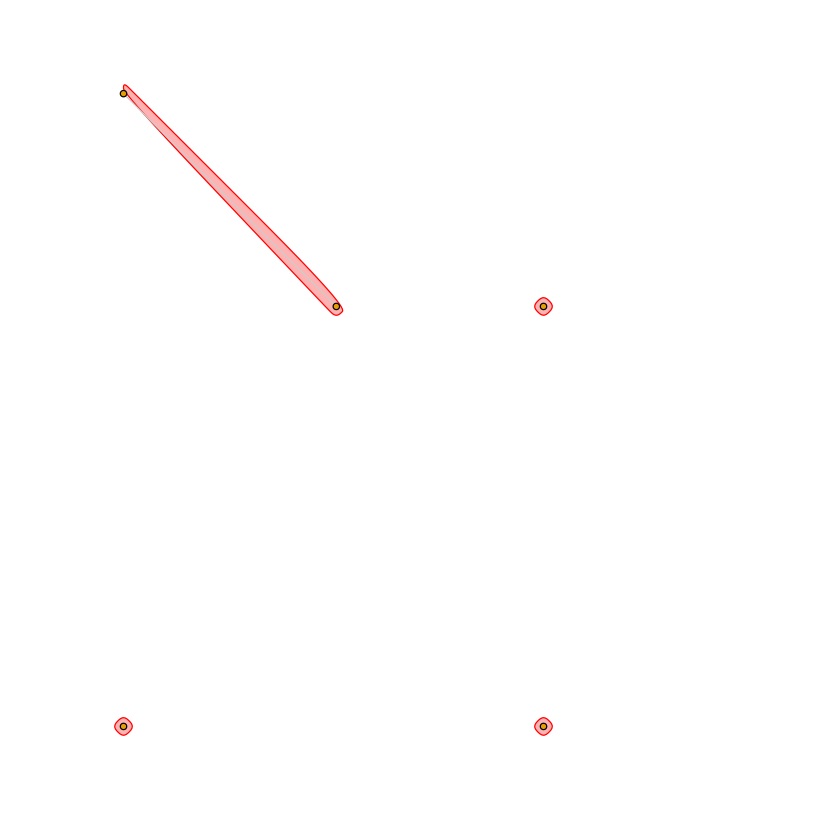

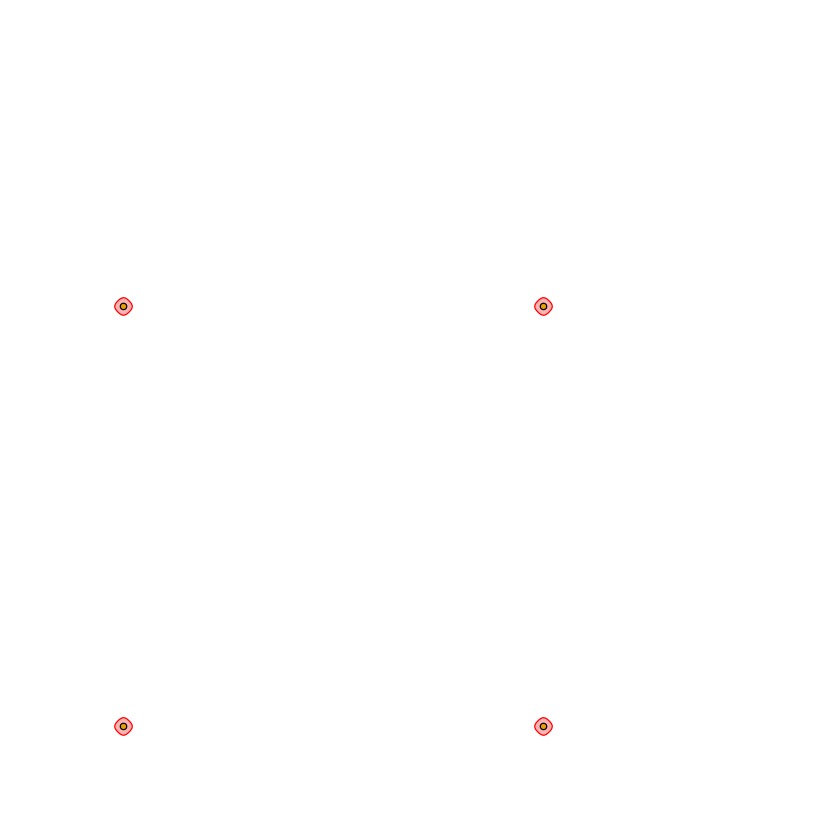

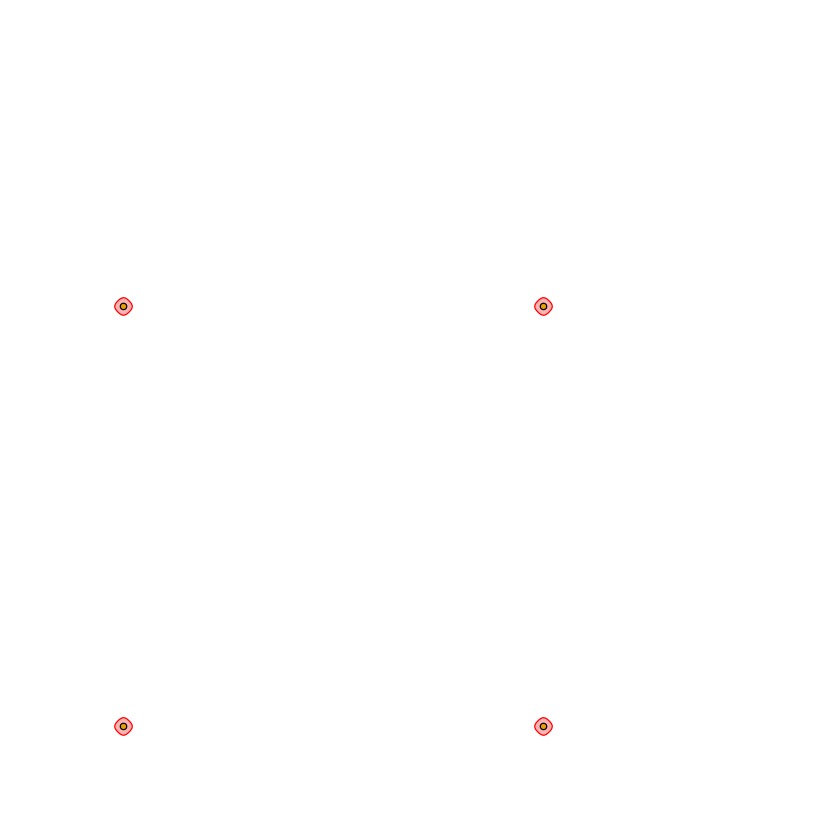

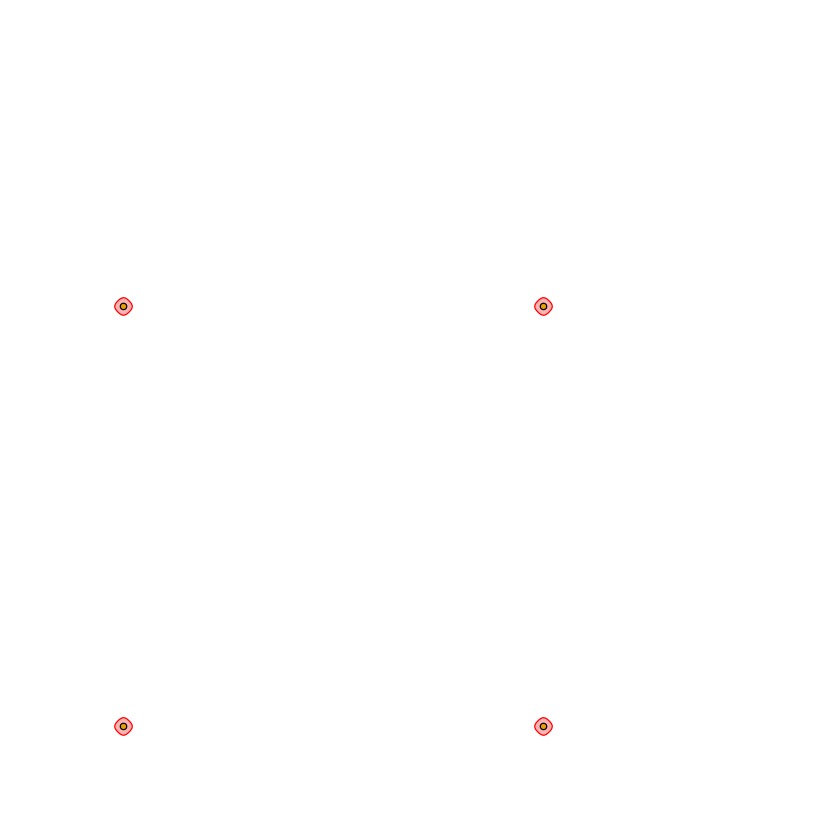

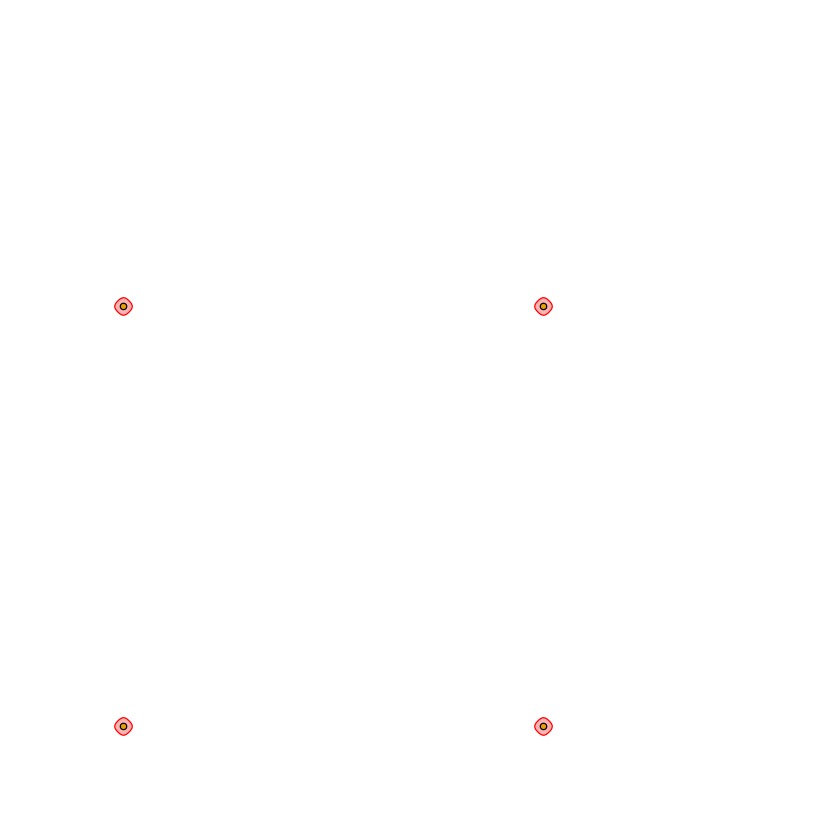

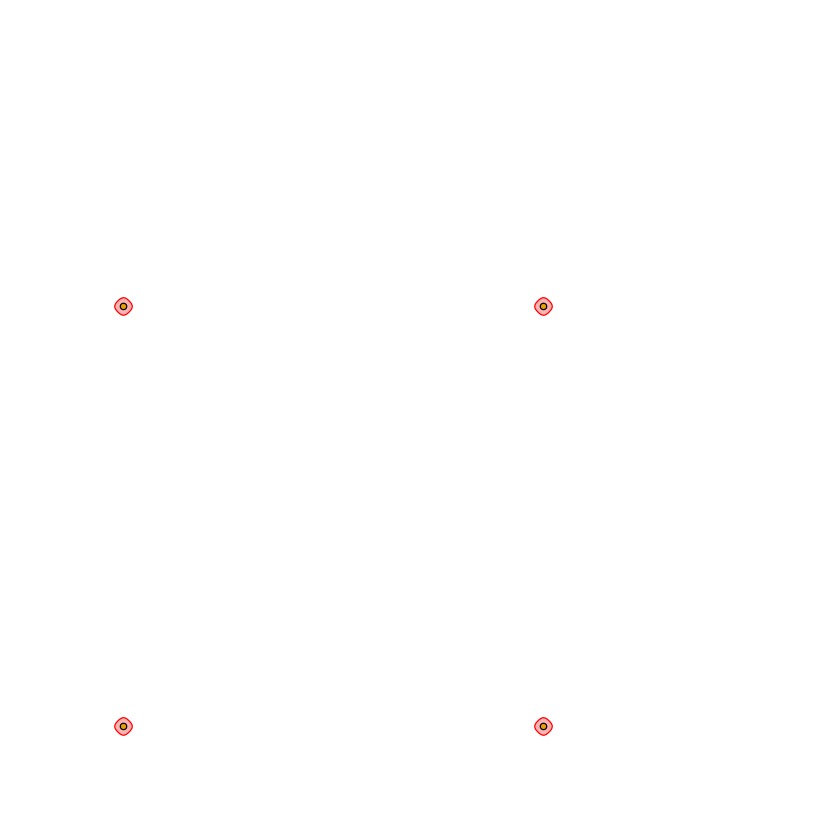

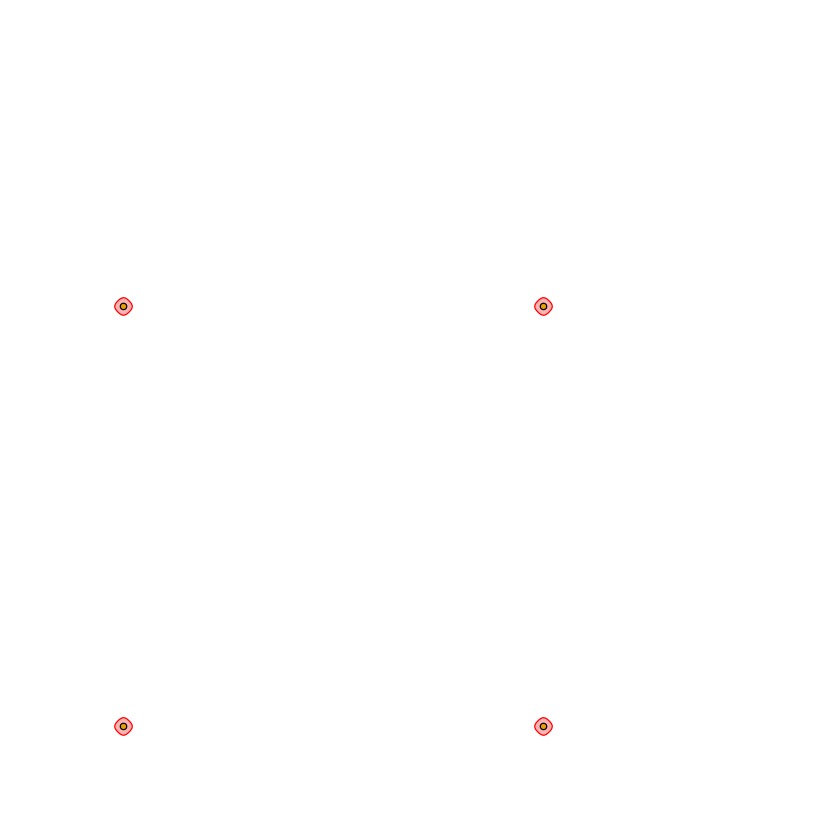

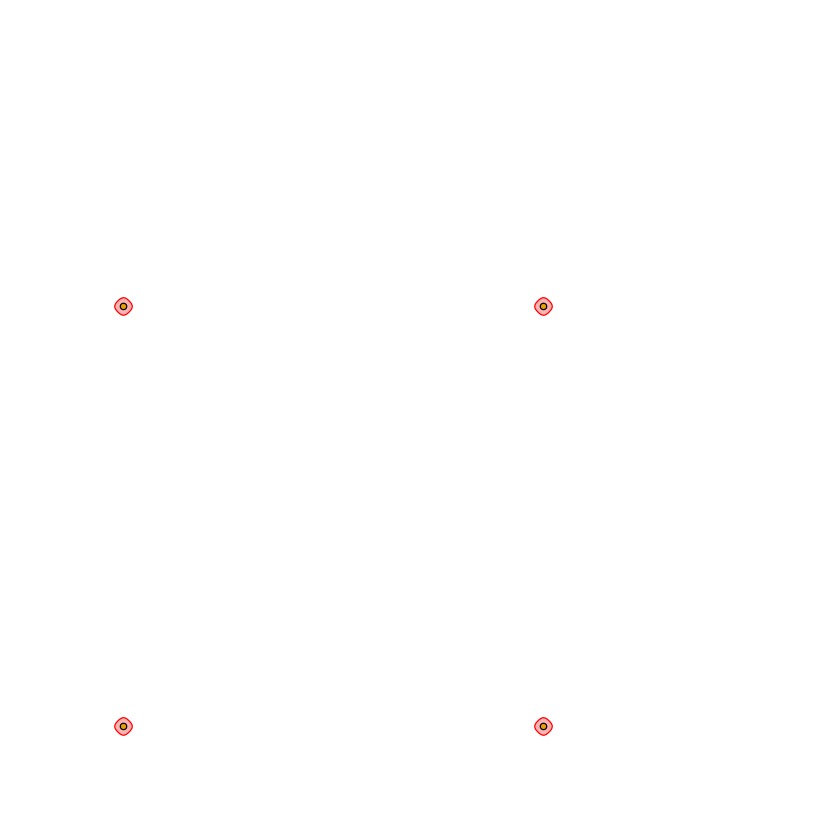

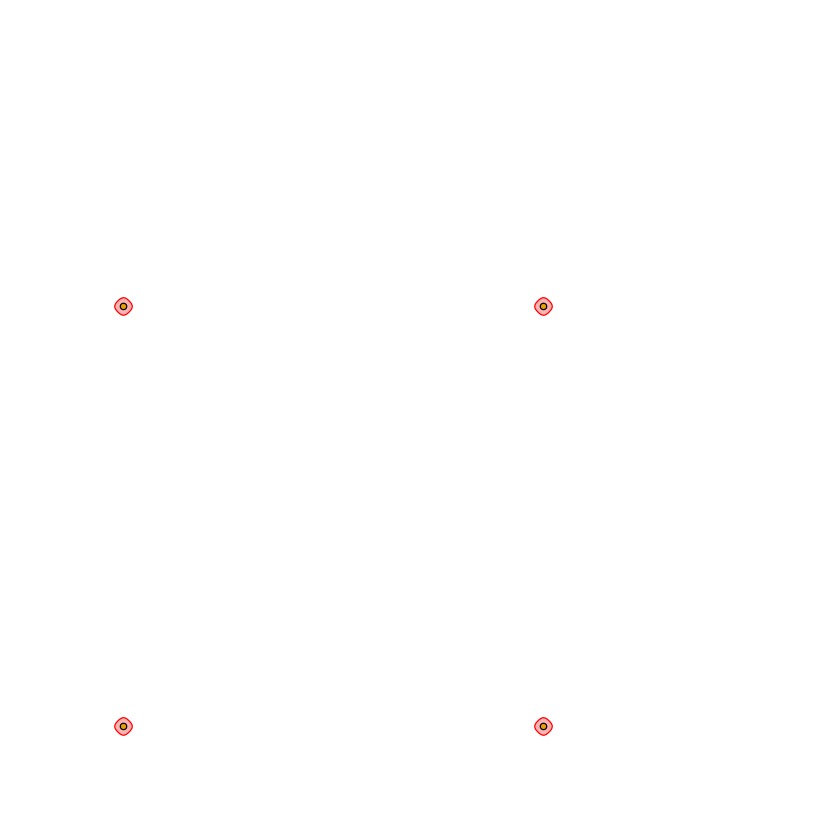

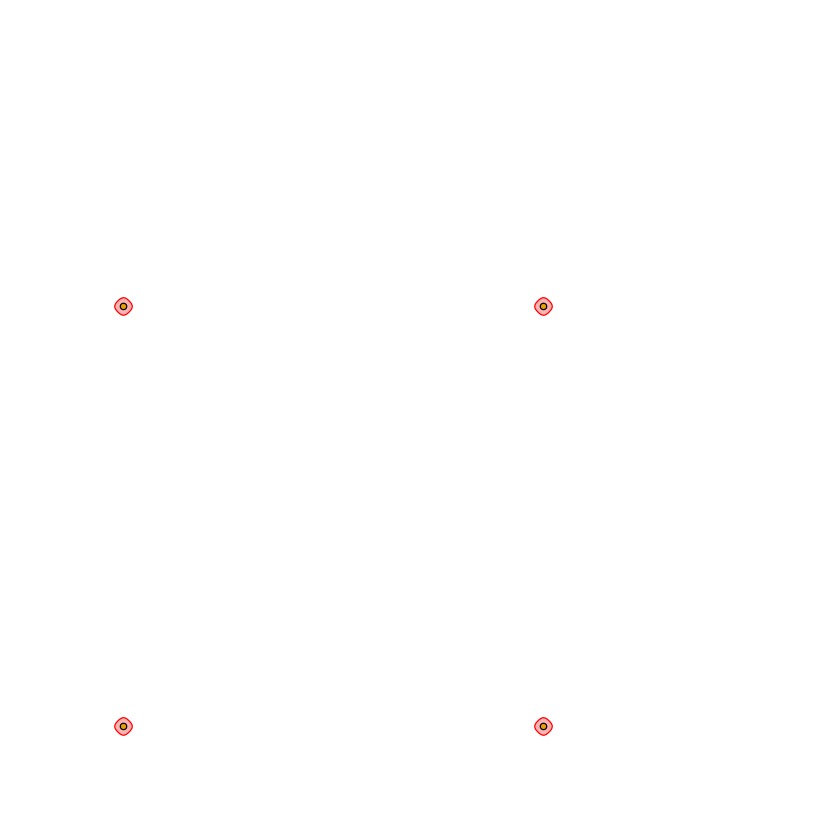

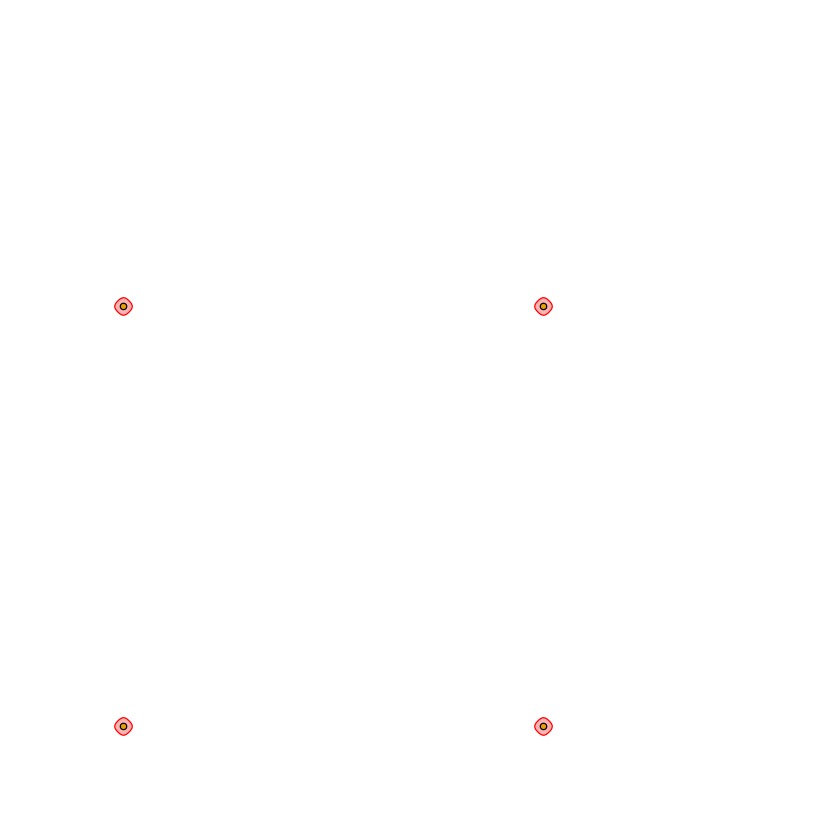

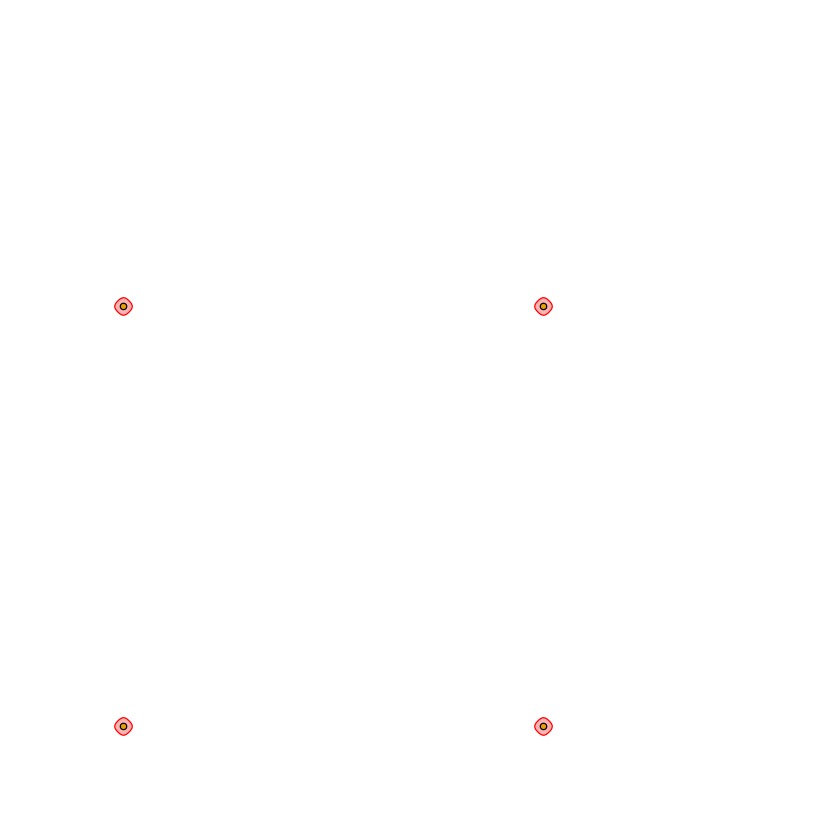

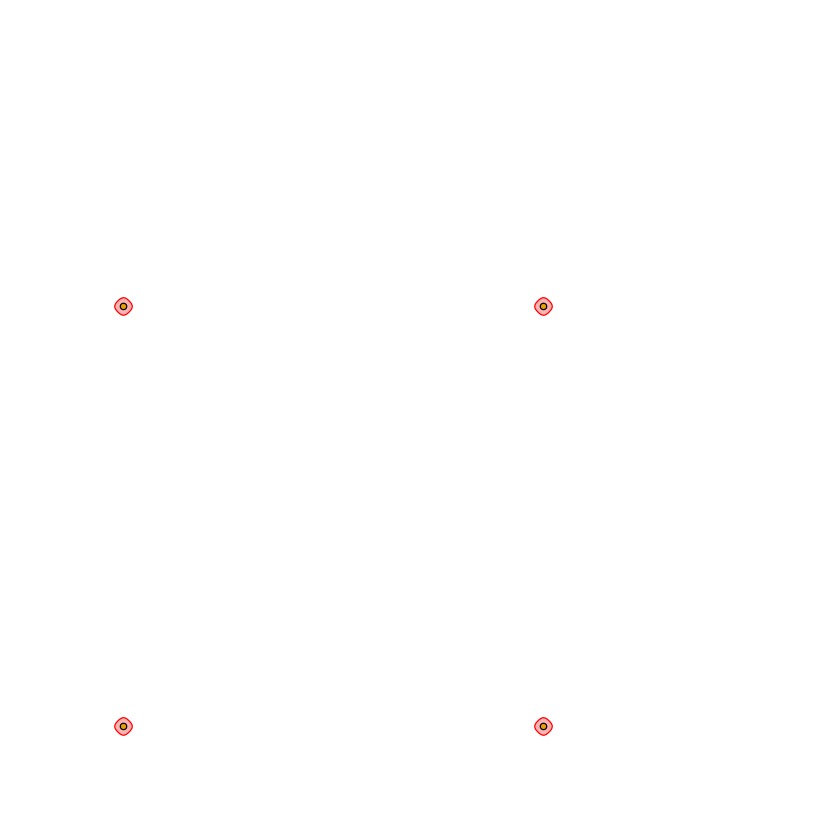

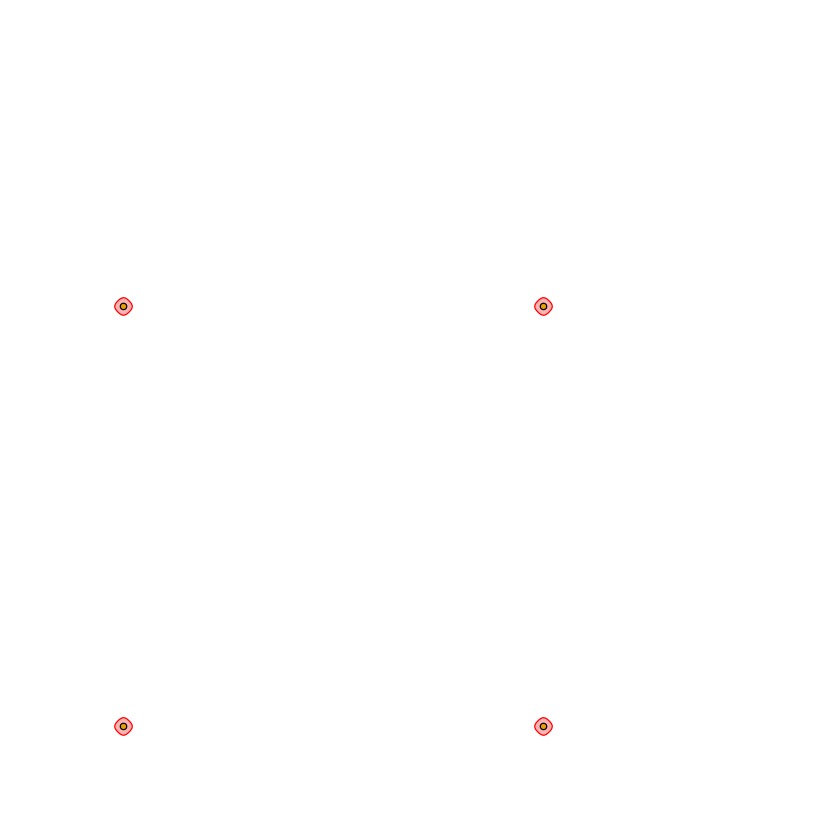

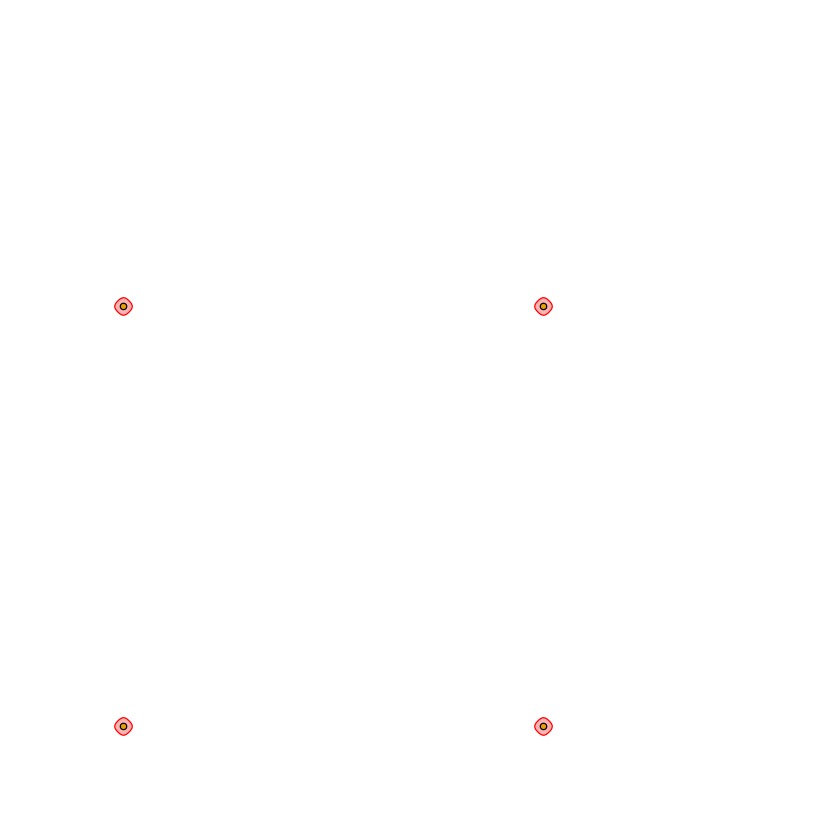

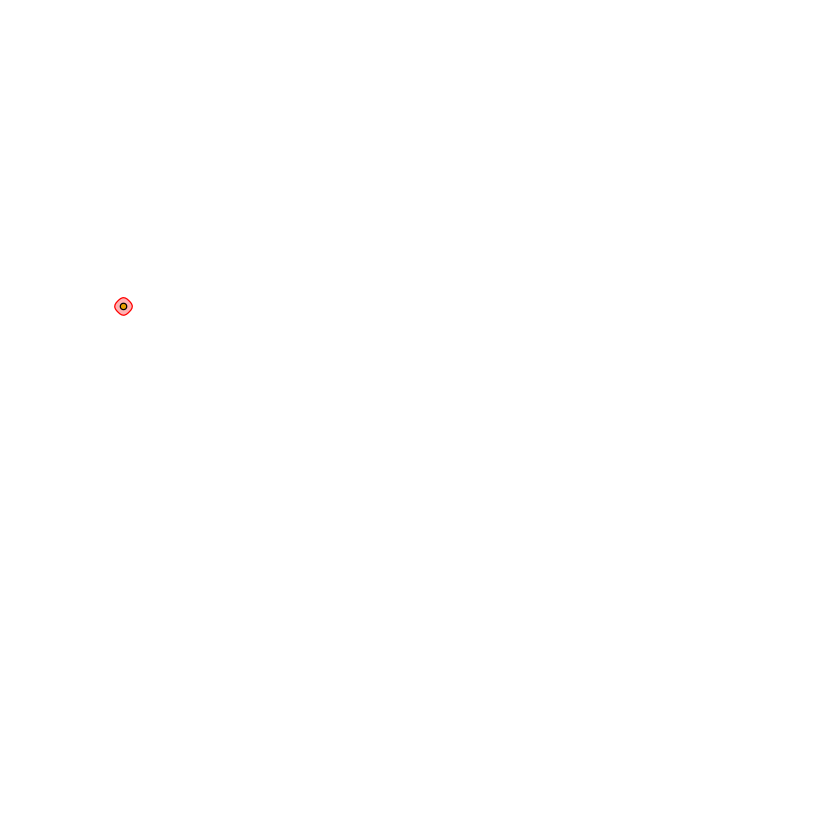

In [ ]:
#It is possible to plot multiple clusters using the plotly package:

par(mfrow=c(2,2))
#par(mar = rep(2, 3))
for(i in 2:length(out)) {
  plot(betweenness_sub[[i]], out[[i]],vertex.size=6,
edge.color="gray80",vertex.label=NA, layout=layout.kamada.kawai)
}

In [ ]:
#get italian reserchers as a subgraph who are not in sector 1.
it <- which(V(PRIN_graph)$name %in% Italiancodes_vec) 
# Extract subgraph of italian researchers only
l <- induced.subgraph(graph=PRIN_graph,vids=it)

l3<-asNetwork(l)

l2=get.inducedSubgraph(l3,which(V(l)$Sector %in% c("SECS-S/02","SECS-S/03","SECS-S/04","SECS-S/05")))
l2


 Network attributes:
  vertices = 143 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 50 
    missing edges= 0 
    non-missing edges= 50 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

In [ ]:
#ergm

#A null model includes only the edges term.,it  ensures that the simulated networks have the same number of edges
#as the observed network. This can be seen by taking the logistic transformation
#of the edges parameter, which gives the overall density of network. 


#Creating the NULL model and the results of fitting the model are stored 
#in a model object for further examination and analysis.

#A null model includes only the edges term.

k<- ergm(l2~edges) # fit model
summary(k) # look in more depth
k$coef #get all the coef inn the model

# We get a negative edge parameter since the network is rather sparse.
## The edge parameter here is the log of the edge odds, i.e. log(#dyads-w-edge/#dyads-no-edge)



Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 





Summary of model fit

Formula:   l2 ~ edges

Iterations:  7 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges  -5.3086     0.1418      0  -37.45   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 14075.0  on 10153  degrees of freedom
 Residual Deviance:   631.1  on 10152  degrees of freedom
 
AIC: 633.1    BIC: 640.3    (Smaller is better.) 

edges 
-5.308565

In [ ]:


gden(l2)
plogis(coef(k))  # conditional probability of having a tie is equal to dencuty 

[1] 0.004924653

edges 
0.004924653

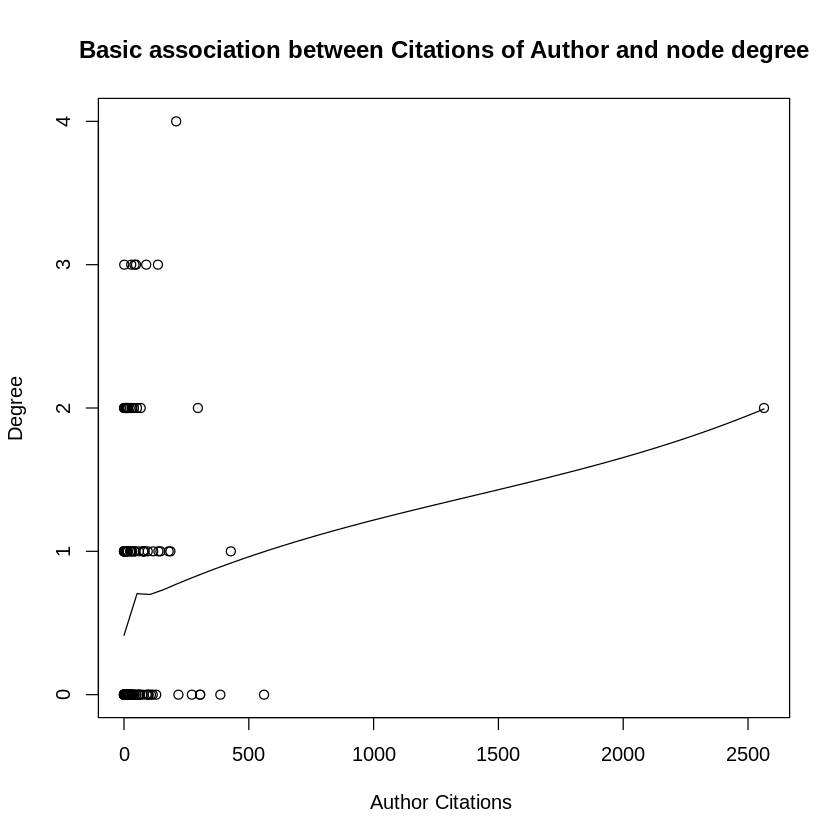

In [ ]:
#Including Node Attributes
#Once a null model is obtained, more interesting models can be fit using a wide
#variety of predictors

scatter.smooth(l2 %v% 'Citations',
degree(l2,gmode='graph'),
xlab='Author Citations ',
ylab='Degree',
main="Basic association between Citations of Author and node degree")
#I am visulizing relation between degree and Citations
#there is no particular relation so I didnt take Citations as a nodal parameter.
#also teh same for References

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.01628.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.0005519.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.




Summary of model fit

Formula:   l2 ~ edges + isolates + nodematch("Sector")

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                 Estimate Std. Error MCMC % z value Pr(>|z|)    
edges             -4.6365     0.3003      0 -15.438   <1e-04 ***
isolates           0.5281     0.3010      0   1.754   0.0794 .  
nodematch.Sector  -0.6567     0.3527      0  -1.862   0.0626 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 14075.0  on 10153  degrees of freedom
 Residual Deviance:   623.9  on 10150  degrees of freedom
 
AIC: 629.9    BIC: 651.5    (Smaller is better.) 

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                     Mean    SD Naive SE Time-series SE
edges             0.17383 8.574  0.13397        0.13273
isolates         -0.06934 8.426  0.13166        0.13107
nodematch.Sector  0.03003 3.323  0.05192        0.05192

2. Quantiles for each variable:

                 2.5% 25% 50% 75% 97.5%
edges             -17  -6   0   6    16
isolates          -17  -6   0   6    16
nodematch.Sector   -7  -2   0   2     6


Sample statistics cross-correlations:
                      edges   isolates nodematch.Sector
edges             1.0000000 -0.9186896        0.5187139
isolates         -0.9186896  1.0000000       -0.4967726
nodematch.Sector  0.5187139 -0.4967726        1.0000000

Sample statistics auto-correlation:
Chain 1 
                edges     isolates nodema

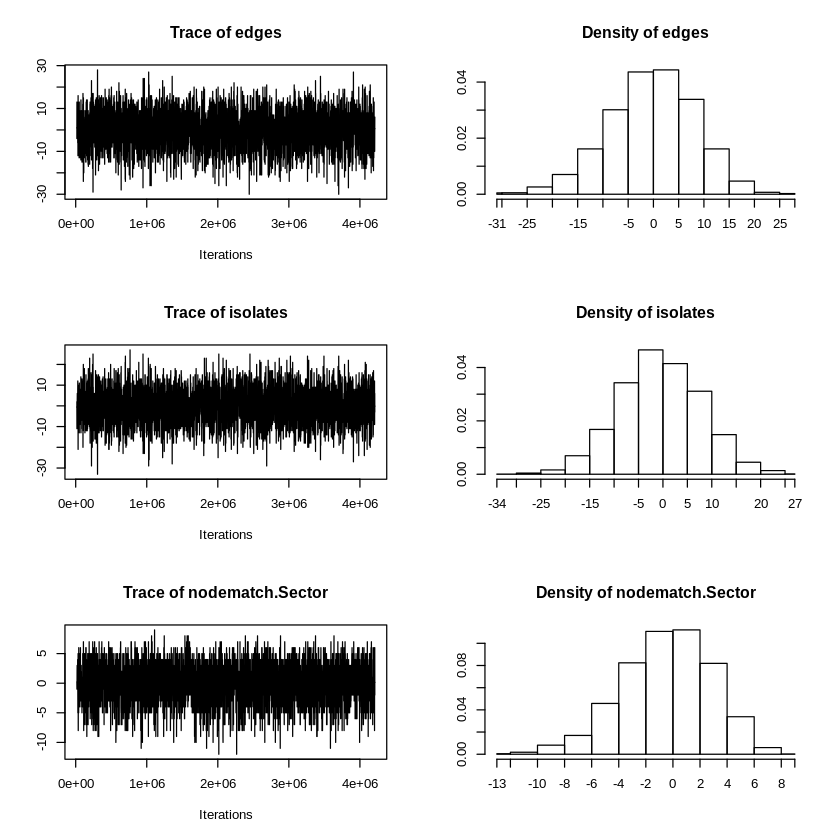

In [ ]:
kKK <- ergm(l2 ~ edges + isolates + nodematch('Sector'))
summary(kKK)

mcmc.diagnostics(kKK)  #I GET VERY BAD RESULT

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.009298.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.0009641.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.




Summary of model fit

Formula:   l2 ~ edges + isolates

Iterations:  2 out of 20 

Monte Carlo MLE Results:
         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -4.8010     0.2970      0  -16.17   <1e-04 ***
isolates   0.5372     0.3018      0    1.78   0.0751 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 14075.0  on 10153  degrees of freedom
 Residual Deviance:   627.8  on 10151  degrees of freedom
 
AIC: 631.8    BIC: 646.3    (Smaller is better.) 

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean    SD Naive SE Time-series SE
edges    -0.3657 8.612   0.1346         0.1346
isolates  0.2942 8.475   0.1324         0.1324

2. Quantiles for each variable:

         2.5% 25% 50% 75% 97.5%
edges     -18  -6   0   6    16
isolates  -16  -5   0   6    17


Sample statistics cross-correlations:
              edges   isolates
edges     1.0000000 -0.9203708
isolates -0.9203708  1.0000000

Sample statistics auto-correlation:
Chain 1 
                 edges     isolates
Lag 0     1.0000000000  1.000000000
Lag 1024 -0.0002784393  0.009249422
Lag 2048  0.0145269013  0.019708995
Lag 3072 -0.0102266643 -0.009638809
Lag 4096 -0.0125872196 -0.010650348
Lag 5120  0.0126347601  0.018285848

Sample statistics burn-in diagnostic (Geweke):
Chain 1 

Fraction 

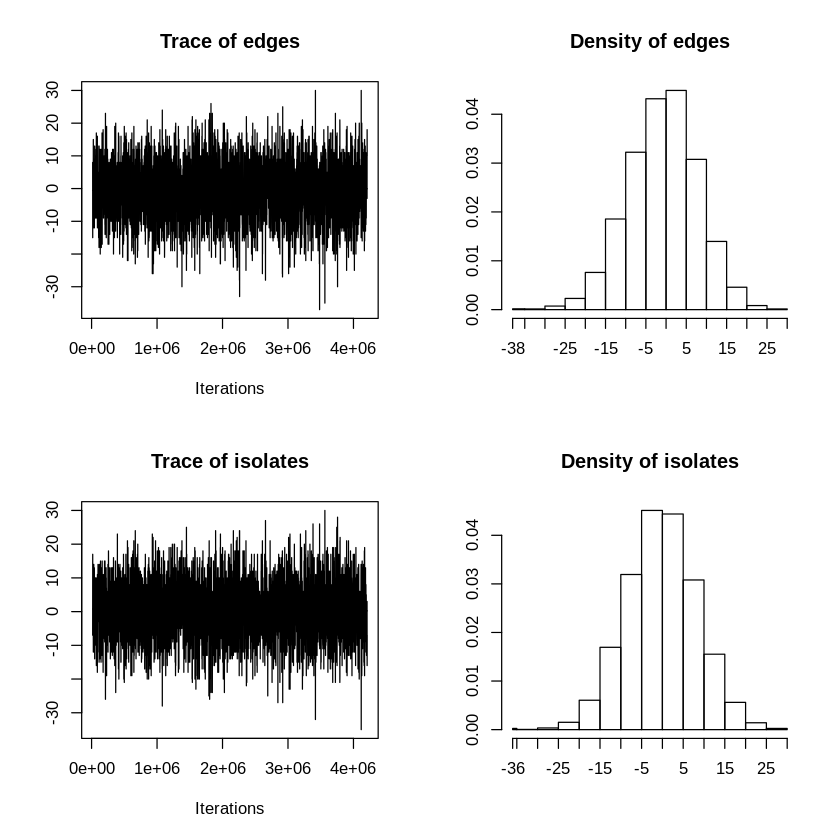

In [ ]:
#THE FINALL MODEL
KK <- ergm(l2 ~ edges + isolates )
summary(KK)

mcmc.diagnostics(KK) 

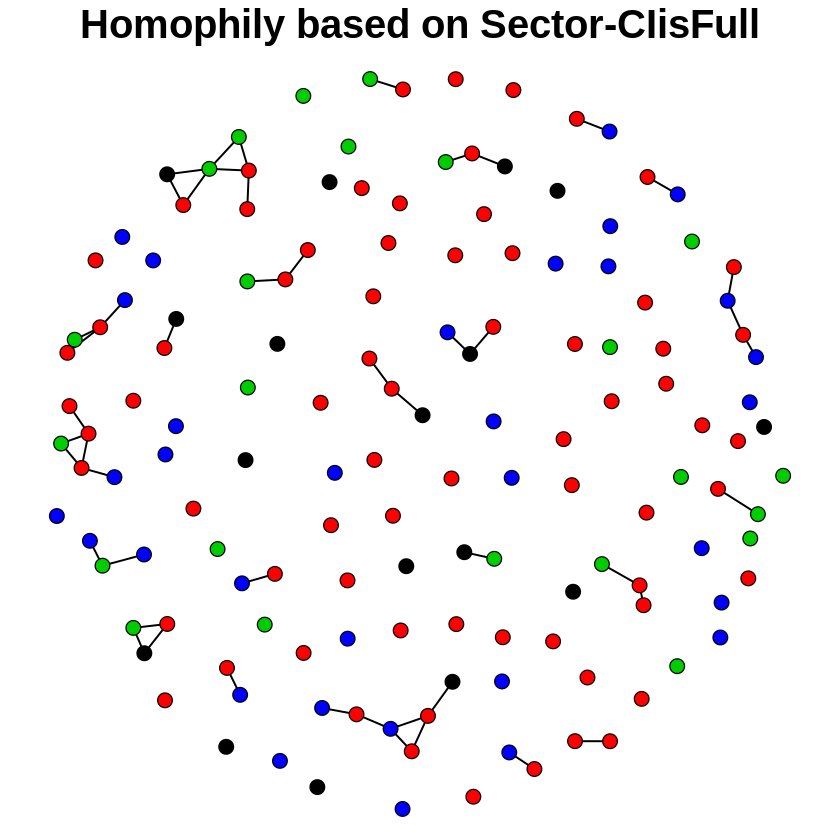

In [ ]:
#lets see that are ties more or less likely between network
#members who are similar to each other on some characteristic (homophily) or not
mesa <- l2
#par(mfrow=c(2,2))
par(mar=c(0,0,2,0))


#plot(mesa,main="Network in sector 1")
#plot(mesa, vertex.col='Citations',main="plot based on Citations")
#legend('bottomleft',fill=7:12,legend=paste('Citations',7:12),cex=0.75)
#plot(mesa, vertex.col='Author.Type',main="plot based on Author.Type")
#plot(mesa, vertex.col='NumDocs',main="plot based on NumDocs")
#plot(mesa, vertex.col='References',main="plot based on References")
plot(mesa, vertex.col='Sector')

title(main="Homophily based on Sector-CIisFull",cex.main=2)


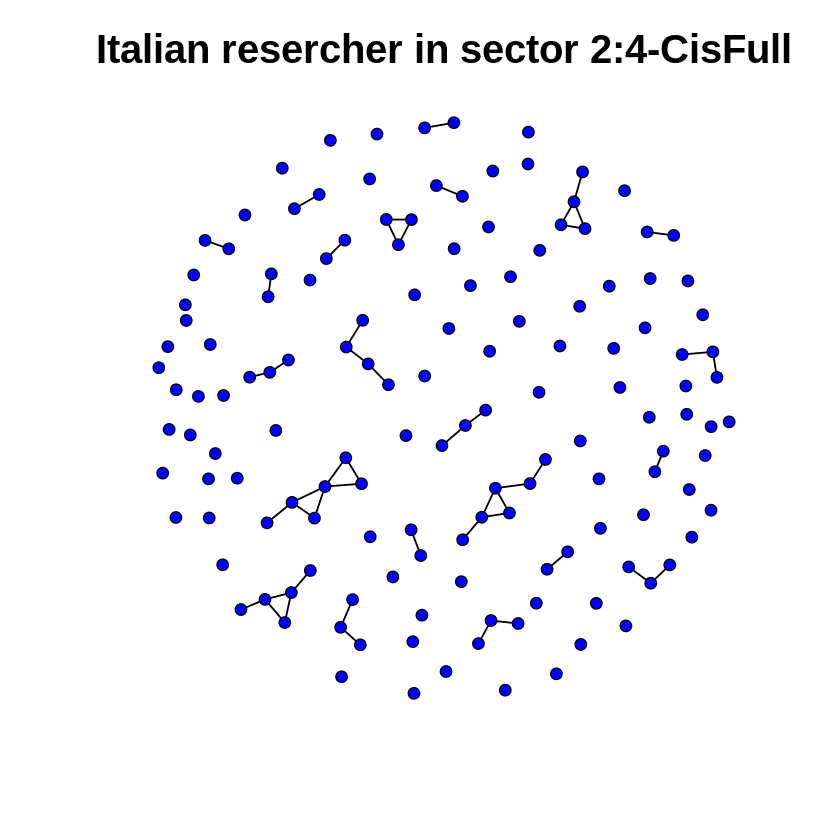

In [ ]:
plot(mesa, vertex.col="blue")
title(main="Italian resercher in sector 2:4-CisFull",cex.main=2)


In [ ]:
#homophily and heterophily. That is, are ties more or less likely between network
#members who are similar to each other on some characteristic (homophily) or dissimilar (heterophily)
table(l2%v%"Sector")
#The raw frequencies of observed ties between different types of actors
mixingmatrix(l2,'Sector')


SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05 
       17        70        23        33 

Note:  Marginal totals can be misleading
 for undirected mixing matrices.
          SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05
SECS-S/02         0         7         3         1
SECS-S/03         7         9        13        14
SECS-S/04         3        13         1         2
SECS-S/05         1        14         2         0

In [ ]:
#THE FINAL MODEL SIMULATION
# SIMULATION

#Once we estimated the model we define a prob. 
#distribution on all possible networks of a given size (= to the observed size). 

# If the model fits the data well we should expect that
# we can draw form this distribution network similar to the observed one (on average)

# For simulation we can use this function
k4.sim <- simulate(KK,nsim=10)
k4.sim 

#To get the first object in a list:

k4.sim[[1]]
l2
gden(l2)
gden(k4.sim[[1]])

Number of Networks: 10 
Model: l2 ~ edges + isolates 
Reference: ~Bernoulli 
Constraints: TNT NULL 143  , 1    , 142  , 2    , 141  , 3    , 140  , 4    , 139  , 5    , 138  , 6    , 137  , 7    , 136  , 8    , 135  , 9    , 134  , 10   , 133  , 11   , 132  , 12   , 131  , 13   , 130  , 14   , 129  , 15   , 128  , 16   , 127  , 17   , 126  , 18   , 125  , 19   , 124  , 20   , 123  , 21   , 122  , 22   , 121  , 23   , 120  , 24   , 119  , 25   , 118  , 26   , 117  , 27   , 116  , 28   , 115  , 29   , 114  , 30   , 113  , 31   , 112  , 32   , 111  , 33   , 110  , 34   , 109  , 35   , 108  , 36   , 107  , 37   , 106  , 38   , 105  , 39   , 104  , 40   , 103  , 41   , 102  , 42   , 101  , 43   , 100  , 44   , 99   , 45   , 98   , 46   , 97   , 47   , 96   , 48   , 95   , 49   , 94   , 50   , 93   , 51   , 92   , 52   , 91   , 53   , 90   , 54   , 89   , 55   , 88   , 56   , 87   , 57   , 86   , 58   , 85   , 59   , 84   , 60   , 83   , 61   , 82   , 62   , 81   , 63   , 80   , 64   , 79   

 Network attributes:
  vertices = 143 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 43 
    missing edges= 0 
    non-missing edges= 43 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector vertex.names 

No edge attributes

 Network attributes:
  vertices = 143 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 50 
    missing edges= 0 
    non-missing edges= 50 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

[1] 0.004924653

[1] 0.004235201

In [ ]:
class(k3.sim)

#It's a list of objects

length(k3.sim)

[1] "network.list"

[1] 10

In [ ]:


#To get the first object in a list:

k4.sim[[1]]

l2


gden(l2)
gden(k4.sim[[1]])

 Network attributes:
  vertices = 143 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 43 
    missing edges= 0 
    non-missing edges= 43 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector vertex.names 

No edge attributes

 Network attributes:
  vertices = 143 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 50 
    missing edges= 0 
    non-missing edges= 50 

 Vertex attribute names: 
    Author Author.Type Citations color H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

[1] 0.004924653

[1] 0.004235201

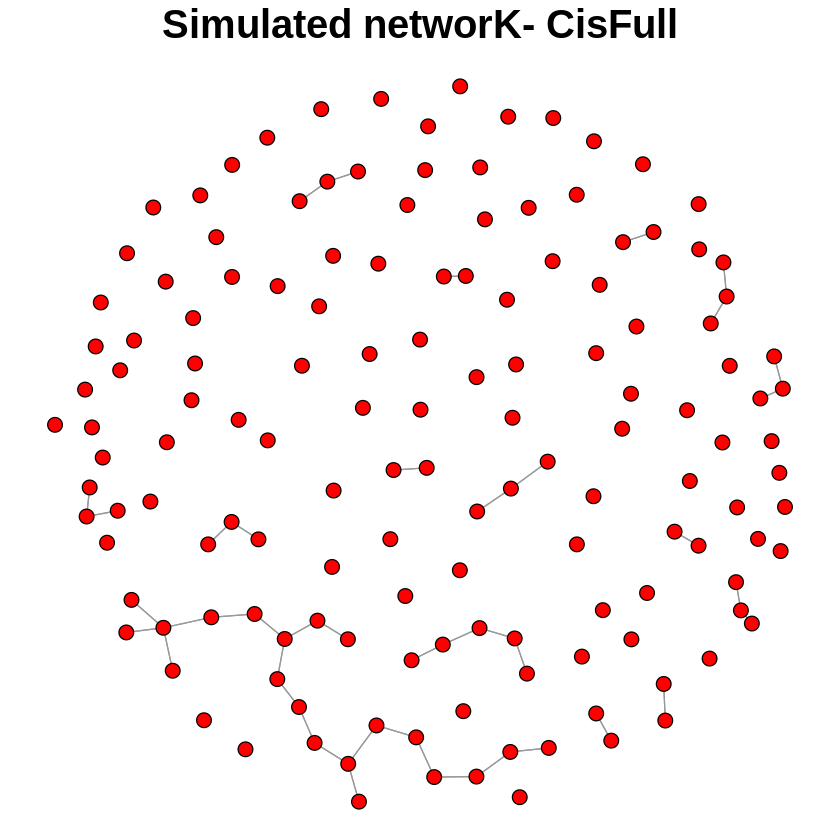

In [ ]:
par(mar=c(0,0,2,0))
gplot(k4.sim[[1]], gmode = "graph",edge.col="gray60",edge.lwd=0.02,
      thresh=0.01,jitter=TRUE)

#Ofc we should expect that differences between
# this drawn network and the observed is given by random fluctuations only
title(main="Simulated networK- CisFull",cex.main=2)


Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.008645.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.0003435.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



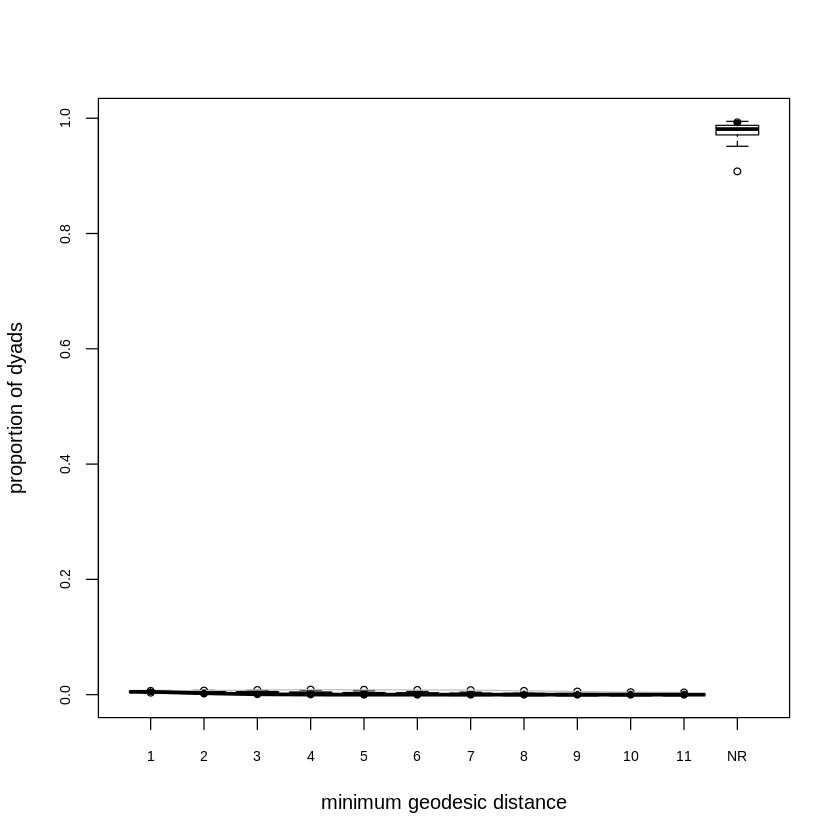

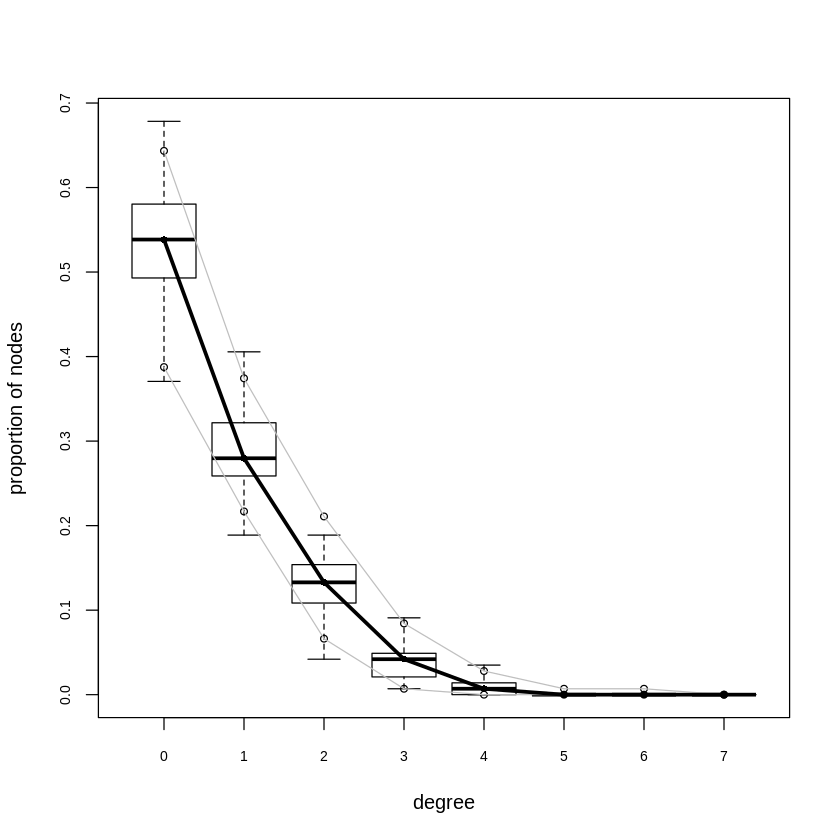

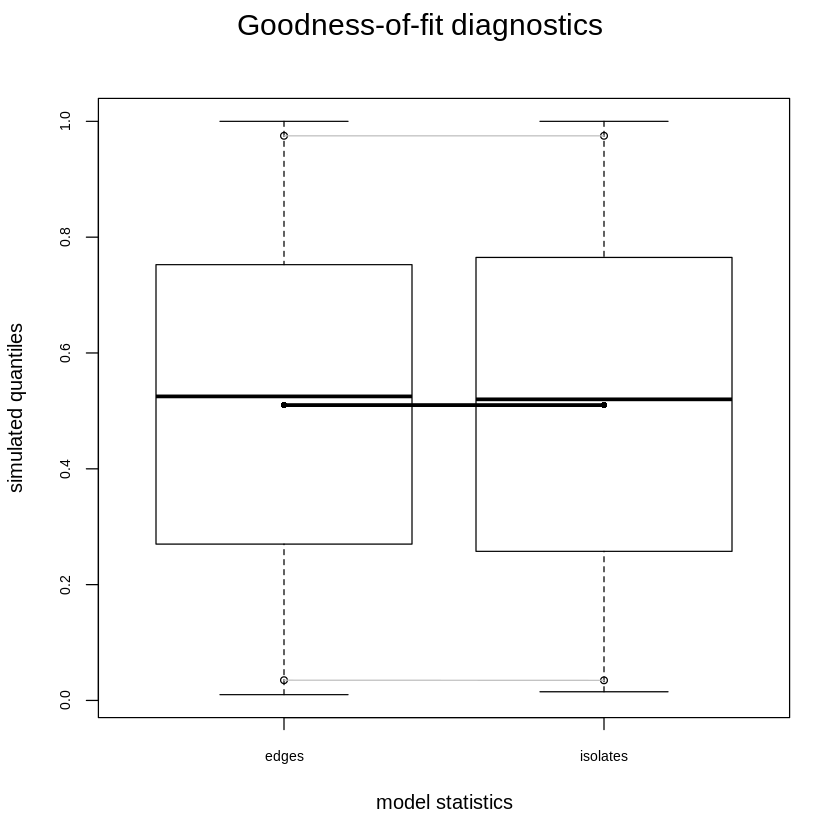

In [ ]:
#Goodness-of-fit for minimum geodesic distance
#Goodness-of-fit for edgewise shared partner
mesamodel.02 <- ergm(mesa~edges + isolates)
mesamodel.02.gof <- gof(mesamodel.02~distance+degree)
plot(mesamodel.02.gof)